<a href="https://colab.research.google.com/github/gianluca-amprimo/data-spaces/blob/master/tesina_Amprimo_s259455.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import os
!git clone https://github.com/gianluca-amprimo/data-spaces.git
os.chdir('/content')

<center>

#**Data spaces Tesina**

*Student*: Gianluca Amprimo s259455

*Academic Year*: 2019/2020
 
 Politecnico di Torino
 </center>


##**1. Introduction and dataset description**

###**1.1 Cardiovasculary Diseases and classification**
As reported by [WHO](https://https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1), cardio vascular diseases are the number 1 cause of death globally: it is estimated that 17.9 million people die each year because of them. These diseases include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. There are several parameters that can be measured from a patient and can provide an indication about the likelyhood of the patient to suffer from CVDs, like blood pressure, glucose and lipids. Identifying patients with the highest risk of developing an heart disease can be crucial to save many lives.

The goal of this paper is to evaluate different classification models to identify such patients, starting from some measured parameters provided by the dataset "Heart Disease UCI" available [here](https://https://www.kaggle.com/ronitf/heart-disease-uci). In particular, the following classifiers will be compared:


*   Gaussian Naive Bayes
*   K-Nearest Neighbours
*   Simple Decision Tree
*   Random Forest

These methods were chosen because they are all quite simple, interpretable (except random forest as will be discussed) and similar to the way in which doctors proceed to identify a sick patient: Naive Bayes works on posterior probability according to the patient symptons; K-NN assigns to a new patient the same label as the patients with the most similar parameters who have already been anaysed; decision trees are a typical approach used in medicine to decide if given certain symptoms a patient has or not a disease . 
All the methods are evaluated both on the original features provided by the employed dataset and on principal components extracted through Principal Component Analisys (PCA), as described in the following sections.

###**1.2 Dataset description**
The dataset contains 1025 records , each one characterised by 14 different attributes, either numerical (continuous, discrete) or categorical (some). The categorical attributes have already been mapped to numbers or binary variables. A complete description of each attribute is shown in Table 1. All records are complete, hence no missing values are present in the data.
<br>
<br>
<center>Table 1- Features of Heart Dataset

| Feature name     | Type        | Brief Description |
|------------------|-------------|-------------------|
| Age              |  Numerical  |age in years       |
| Sex              |     Binary  |1=male, 0=female   |
| Cp               | Categorical |chest pain type (values 0-3, <br>increasing pain level)              |
| Trestbps         | Numerical   | resting blood pressure (in mm Hg, <br>on admission to the hospital |
| Chol             | Numerical   | serum cholestoral in mg/dl                                             |
| Fbs              | Binary      |fasting blood sugar>120 mg/dl <br>(1=true; 0=false)                |
| Restecg          | Categorical   |resting electrocardiographic results 0= normal, 1= ST-T wave abnormality, <br> 2= probable or definite left ventricular hypertrophy by Estes' criteria                        |
|Thalac            | Numerical   |   maximum heart rate achieved                                        |
|Exang             | Binary      |exercise induced angina (1=yes; 0=no)                                 |
|Oldpeak           | Numerical   |ST depression induced by exercise relative to rest                                                 |
|Slope             | Categorial   |the slope of the peak exercise ST segment 1= upsloping, 2= flat, <br> 3=downsloping                            | 
|Ca                | Numerical   |number of major vessels (0-3) colored by flourosopy                  |
|Thal              | Categorical | 3 = normal; 6 = fixed defect; 7 = reversable defect                  |
|Target            |  Binary     | Heart Disease=1; No Heart Disease=0                 |



###**1.3 Tools**
The code was implemented in Python, using the following libraries:


*   **pandas**:  library for handling data in the form of dataframes. 
*   **matplotlib**: the basic library for plots.
*   **seaborn**:  library based on matplotlib for more complex plots.
*   **scikit-learn**: library containing machine learning algorithms and tools for evaluating machine learning models.
*   **numpy**: basic library for matrix and linear algebra.
*   **itertools**: library for looping through data. 




In [ ]:
%%capture
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve as ROC, recall_score, precision_score 
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
import itertools  as it
from sklearn import tree as t 
from sklearn.ensemble import RandomForestClassifier as rf

def encode_and_bind(original_dataframe, feature_to_encode):
    original_dataframe[feature_to_encode]=original_dataframe[feature_to_encode].astype('category')
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.drop(feature_to_encode, axis=1, inplace=True)
    return(res)

##**2. Data statistics and preprocessing**

###**2.1 Data statistics** 

First, the data are loaded into a pandas dataframe.  Table 2 shows some statistics computed only over numerical attributes.

In [ ]:
heart_ds=pd.read_csv("./data-spaces/heart.csv")

print("Table 2-Data statistics")
statistics_df=heart_ds[["age", "trestbps", "chol", "thalach", "oldpeak"]]
display(statistics_df.describe().round(2))

Table 2-Data statistics


,age,trestbps,chol,thalach,oldpeak
count,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,131.61,246.00,149.11,1.07
std,9.07,17.52,51.59,23.01,1.18
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,132.00,0.00
50%,56.00,130.00,240.00,152.00,0.80
75%,61.00,140.00,275.00,166.00,1.80
max,77.00,200.00,564.00,202.00,6.20


Here's a brief explaination of each measure:


*   *count*: the total number of rows in the dataset with a value for that attribute. Having no missing values, it coincides with the number of rows in the dataset for each attribute.
*   *mean:* average value of the feature
*   *std:* standard deviation of the feature
*   *min:* minimum value assumed by the feature
*   *25%, 50%, 75%*: percentile values. The 50% percentile coincides with the median.
*   *max:* maximum value assumed by the feature

For example, it can be observed that the average age of the patients in the dataset is 54±9, the youngest patient is 29 years old, the oldest is 77. However, the 75% of the patient is below 61.

To better visualize how the values of the numerical attributes are distributed, boxplots are employed (Fig 1-2). For a better visualization, *oldpeak* is plotted on its own, having a very small scale with respect to the other attributes (fig. 2). 



Figure 1- Boxplot of heart dataset features age, trestbps, chol and thalach


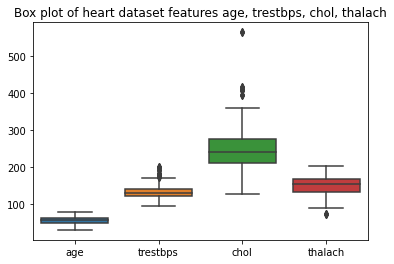

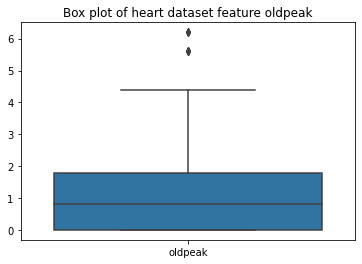

Figure 2- Boxplot of numerical features (oldpeak) of heart dataset


In [ ]:
##boxplot
plt.title("Box plot of heart dataset features age, trestbps, chol, thalach")
labels=heart_ds['target']
sb.boxplot(data=heart_ds[['age','trestbps', 'chol', 'thalach']])
plt.figure()
print("Figure 1- Boxplot of heart dataset features age, trestbps, chol and thalach")
plt.title("Box plot of heart dataset feature oldpeak")
sb.boxplot(data=heart_ds[['oldpeak']])
plt.show()
print("Figure 2- Boxplot of numerical features (oldpeak) of heart dataset")

In boxplots, the box is delimited by the first and the third quartile and cut in half by the second one (the median), whereas the two segments connect the box to the maximum and the minimum value. Boxplots are useful for identifying outliers, which are the dots outside the boxes. All the classes have some outliers, in particular *chol* has some values that are very far from the box, above 500. However, even if large, these values could be reached in theory by a patient, so it's very likely that they do not represent  mistakes in the data, hence they are maintained.  
Figures 3 to 7 show boxplots of attributes with respect to the two target classes.

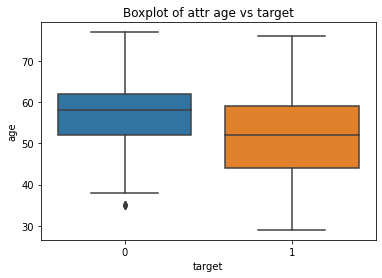

Figure 3- Boxplot of attribute age vs target



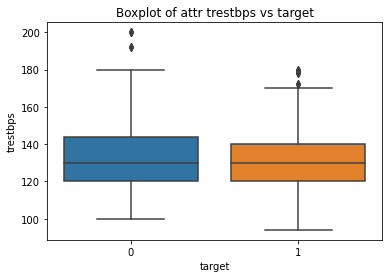

Figure 4- Boxplot of attribute trestbps vs target



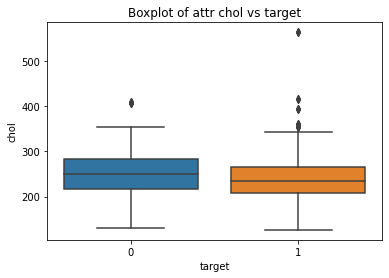

Figure 5- Boxplot of attribute chol vs target



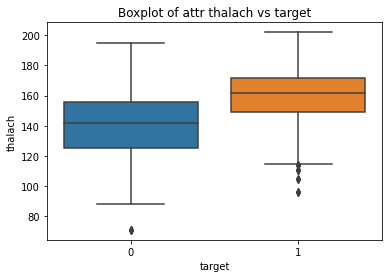

Figure 6- Boxplot of attribute thalach vs target



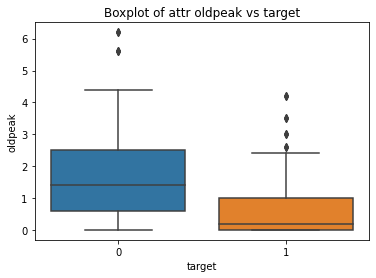

Figure 7- Boxplot of attribute oldpeak vs target



In [ ]:
i=3
for attr in ['age','trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure()
    plt.title("Boxplot of attr "+attr+" vs target")
    sb.boxplot(x="target", y=attr, data=heart_ds)
    plt.show()
    print("Figure "+str(i)+"- Boxplot of attribute "+attr+" vs target\n" )
    i+=1

In general, patients with diagnosed heart diseases are between 45-60 years old, but also healthy patients show a similar distribution in age, hence it is likely that this feature will not be so crucial in distinguish between the two classes on its own. This seems to apply also for *trestbps*. *Thalac* and *oldpeak*, instead, show much more separation: sick patients have *thalac* between 155 and 170 and *oldpeak* value between 0 and 1, whereas healthy ones are mainly distributed between 125 and 160 for the former and between 0.7 and 2.5 for the latter. It is also worth noticing that the outliers of *chol*  (in particular the ones above 500) are almost always associated to sick patients, which is more than reasonable. Clearly also the features that do not seem relevant on their own, could have an interplay with other attributes which could be used by a classifier to separate the two target classes.  <br> 
<br>
To analyse the categorical and binary attributes, countplots are used. Figures from 8 to 15 show how the records are distributed for each possible value of each categorical feature with respect to the target. Figure 16 shows how the records are distributed between the two target classes.

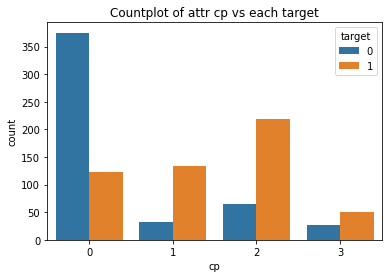

Figure 8- Countplot of attr cp vs each target



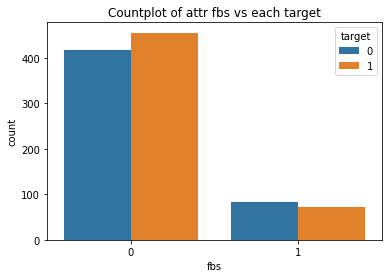

Figure 9- Countplot of attr fbs vs each target



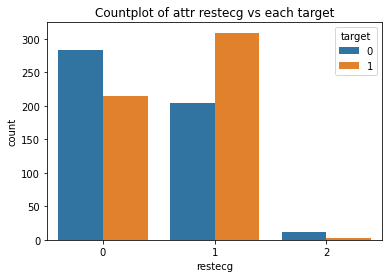

Figure 10- Countplot of attr restecg vs each target



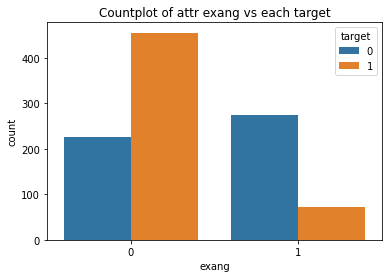

Figure 11- Countplot of attr exang vs each target



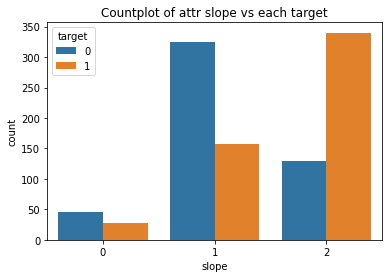

Figure 12- Countplot of attr slope vs each target



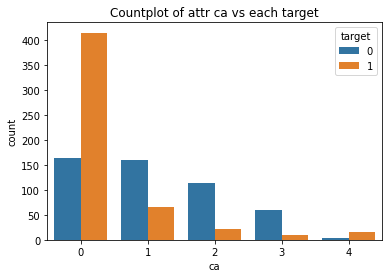

Figure 13- Countplot of attr ca vs each target



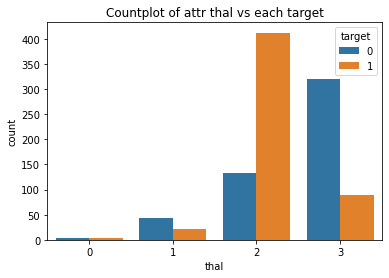

Figure 14- Countplot of attr thal vs each target



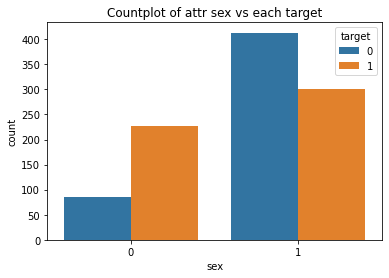

Figure 15- Countplot of attr sex vs each target



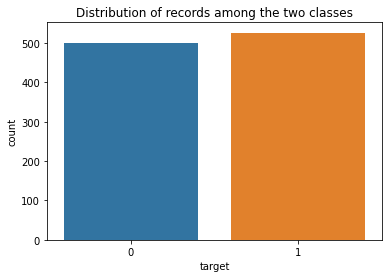

Figure 16- Distribution of records among the two classes


In [ ]:
#countplots
i=8
for attr in ['cp','fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'sex']:
    plt.figure()
    plt.title("Countplot of attr "+attr+" vs each target")
    sb.countplot(x=attr,data=heart_ds, hue='target')
    plt.show()
    print("Figure "+str(i)+"- Countplot of attr "+attr+" vs each target\n")
    i+=1


plt.figure()
plt.title("Distribution of records among the two classes")
sb.countplot(x='target', data=heart_ds,)
plt.show()
print("Figure "+str(i)+"- Distribution of records among the two classes")

Some quite evident observations:

* patients with *cp*=0 are likely to be healthy (Fig. 8)
* patients with *slope*=2 are likely to be sick, whereas for *slope*=1 they are likely to be healthy (Fig. 12).
* patienst with *ca*=0 are likely to have heart issues (Fig. 13)
* patients with *thal*=2 are likely to be sick, whereas if *thal*=3 they are likely to be healthy (Fig. 14)
* *sex* is unbalanced in the dataset, records mainly refer to male subjects (Fig. 15)
*   the dataset is balanced with respect to the target, it contains almost the same number of records with and without heart disease (Fig.16). 







###**2.2 Data preprocessing: 1-hot-encoding and standardization**
Before going on with the analysis, some preprocessing needs to be carried out over the data.
First of all, it is necessary to handle categorical attributes. Correlation, necessary for PCA, and most of machine learning models are based on the concept of distance which cannot be applied to categorical features as they are, even though they were already mapped to numbers (these values were randomly assigned and do not convey any distance information). Among the possible choices to solve this issue, **1-hot-encoding** was chosen. <br>
1-hot-encoding means that for each categorical feature, N binary variables are generated, where N is the number of possible values the original features could take. For example, feature *slope* is mapped to 3 new features and a record with *slope*=1 will have only the first of them set 1, the other two will be set to 0.  Binary attributes, like *sex*, do not need further preprocessing because they already can assume only value 0 or 1. 
One Hot Encoding should not be used when the categorical features have a large N or too many additional dimensions are added to the problem. However in this dataset the maximum N for a categorical feature is 3, so it is reasonable to use such tecnicque. 

In [ ]:
#1_hot_encoding for categorical variables
for attr in ['restecg', 'slope','cp', 'thal']:
    heart_ds=encode_and_bind(heart_ds, attr)
print("Table 3-A slice of the dataset after one hot encoding")
display(heart_ds[1:10])

Table 3-A slice of the dataset after one hot encoding


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
1,53,1,140,203,1,155,1,3.1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
5,58,0,100,248,0,122,0,1.0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
6,58,1,114,318,0,140,0,4.4,3,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0
7,55,1,160,289,0,145,1,0.8,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
8,46,1,120,249,0,144,0,0.8,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
9,54,1,122,286,0,116,1,3.2,2,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


Another important preprocessing step is **standardization** of the numerical features. As we have seen in section 1.2, the numerical attributes have different scale and have different distributions. In particolar this was evident in the case of *oldpeak*, which has a much smaller scale with respect to, for example, *trestbps* and *chol*. This could affect the algorithms, because larger features would be weighted more then smaller one (for example in evaluating distances for K-NN). Given a record  $x$ (a vector containing only the numerical features), the standardized version $x'$ was computed as

> $$x'=\frac{x-x_{mean}}{\sigma_{x}}$$

in which $x_{mean}$ and $\sigma_{x}$  are the vectors containing respectively the mean value and the standard deviation of each numerical feature in the dataset. Hence the standardized records will have 0 mean and standard deviation equal to 1.   


In [ ]:
##normalize qualitative attribute as x_n=x-mean/std
scaler = ss()
scaler.fit(heart_ds[['age','trestbps', 'chol', 'thalach', 'oldpeak']])
heart_ds[['age','trestbps', 'chol', 'thalach', 'oldpeak']]=scaler.transform(heart_ds[['age','trestbps', 'chol', 'thalach', 'oldpeak']])

print("Table 4-A slice of the dataset after normalization")
display(heart_ds[1:10])


Table 4-A slice of the dataset after normalization


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
1,-0.158157,1,0.479107,-0.833861,1,0.255968,1,1.727137,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,0,-1.048692,1,1.301417,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0,0.516900,0,-0.912329,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,1,-1.874977,0,0.705408,3,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
5,0.393241,0,-1.805540,0.038784,0,-1.179158,0,-0.060888,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
6,0.393241,1,-1.005914,1.396233,0,-0.396362,0,2.834010,3,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0
7,0.062402,1,1.621431,0.833861,0,-0.178919,1,-0.231177,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
8,-0.930114,1,-0.663216,0.058176,0,-0.222407,0,-0.231177,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
9,-0.047877,1,-0.548984,0.775685,0,-1.440090,1,1.812281,2,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


###**2.3 Correlation**



Another useful metric to analyse the data is correlation which evaluates the degree of linear association between each pair of features. The concept of correlation used is Pearson correlation: given two random variable $X$ and $Y$ with standard deviations $\sigma_{X}$ and $\sigma_{Y}$ the Pearson Correlation coeffiecient $\rho_{X,Y}$ is defined as

> $$\rho_{X,Y}=\frac{COV(X,Y)}{\sigma_{X}\sigma_{Y}}$$

When the correlation coefficient is 1 we have positive correlation, so the two random variables will have the same behaviour; 0 means no correlation whereas -1 is negative (sometimes called anti) correlation.<br>
 Correlation matrix contains the correlation value for each pair of attributes (Fig. 16). Being $COV(X,Y)=COV(Y,X)$, the matrix is simmetric and it has all values in the main diagonal set to 1. 


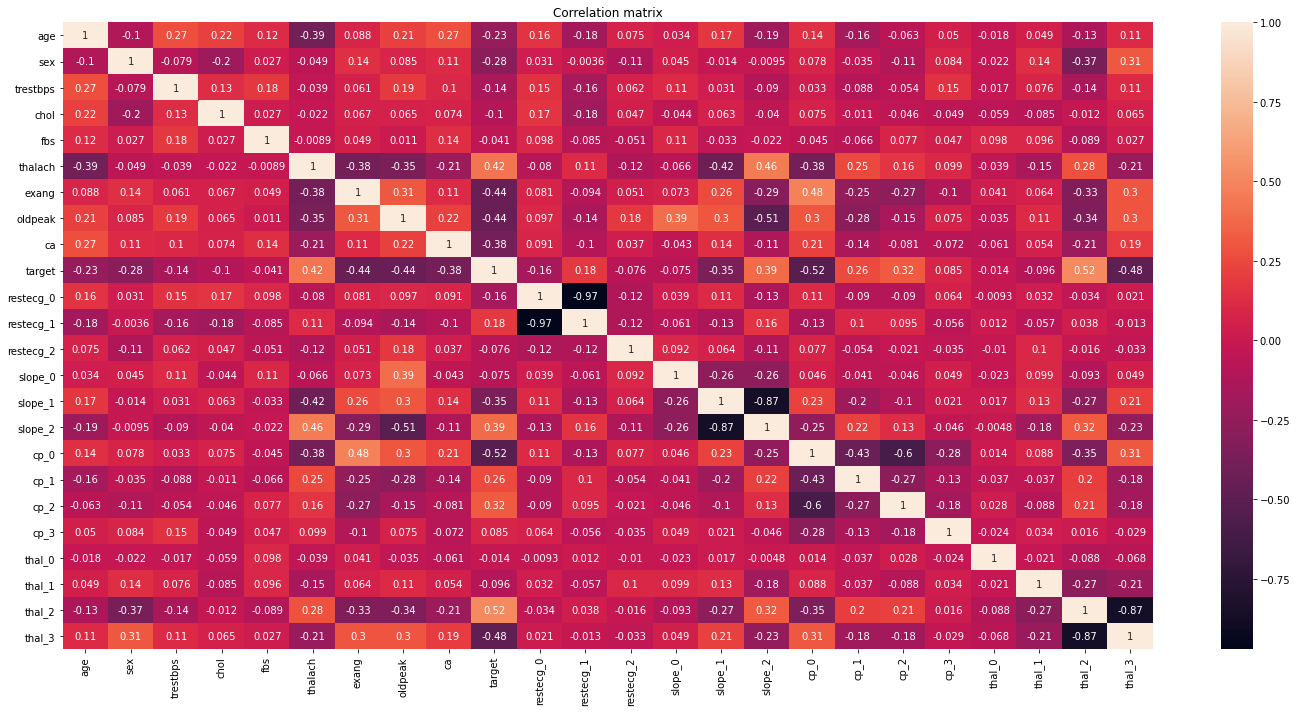

Figure 17- Correlation matrix


In [ ]:
#correlation matrix 
f, axes = plt.subplots(figsize=(20, 10))
plt.title("Correlation matrix")
corr=heart_ds.corr()
sb.heatmap(corr,  annot=True, fmt='.2g', ax=axes) 
plt.tight_layout()
plt.show()
i+=1
print("Figure "+str(i)+"- Correlation matrix")


Overall, it does not seem to be a strong correlation among the different features. In particular, focusing on *target*, which is the label to predict, we can observe that it has maximum positive and negative correlation with respectivily *cp=0* and *thal=2*, indeed as said in section 2.1 when *cp*=0 most of the patients tend to be healthy, whereas when *thal*=2 the majority of the patients are sick. Also with *thal=3* the anticorrelation is considerable and for that value it was observed that most of the patients were healthy.



### **2.4 Principal Component Analysis**


As mentioned in section 1.1, the data will be classified with respect to the original features in the dataset and then with respect to their projections over the principal components extracted through Principal Component Analysis.
Principal Component Analysis is an unsupervised tecnique that is used to perform dimensionality reduction and features decorrelation. 
It consists in finding a projection of the data in a lower dimensional space, preserving most of their variance (which is related to information content): indeed the data are projected with respect to the directions associated to the maximum variation. These directions are called the principal components. 
To identify the principal components, the data are organized in a matrix $X\in R^{PxF}$, being $P$ the number of records in the dataset and $F$ the number of features after preprocessing (in this case $X$ is a 1025x23 matrix: *target*, which is the label to infer, is removed before applying PCA).
Then the following operations over $X$ have to be performed:


*   standardize $X$ such data the data are centered (already performed in 2.2)
*   compute the sampled covariance matrix $\Sigma=X^{T}X$. $\Sigma$ is a symmetric $F$x$F$ matrix hence it can be eigendecomposed.
* compute the eigenvalues $\lambda_{i}$ and eigenvectors $u_{i}$ of the sampled covariance matrix, sort them in descending order according to the eigenvalues magnitude. The eigenvalues represents a measure of the variance explained by the associated direction. 
* select the first K eigenvectors such that $$\sum_{i=1}^{K} \lambda_{i} >=\beta\sum_{k=1}^{F} \lambda_{k}\;\;\;\;\;  0<\beta<1 $$ 
meaning that we will maintain, of the total variance, only a fraction decided by parameter $\beta$
* the selected eigenvectors form a basis of the space where the data will be projected. Collect them in a matrix $W$ and compute the projection of the original data with respect to this new space as $\tilde{X}=XW$





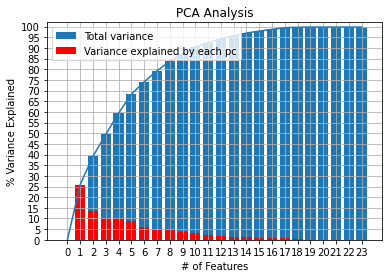

Figure 18- Cumulative variance explained by principal components


In [ ]:
pca=PCA() 
heart_ds_with_target=heart_ds.copy()
heart_ds=heart_ds.drop('target', axis=1)
heart_pca=pca.fit_transform(heart_ds)
principalDf = pd.DataFrame(data = heart_pca[:,:2]
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, heart_ds_with_target[['target']]], axis = 1)
var_per_comp=np.round(pca.explained_variance_ratio_, decimals=3)*100
var_per_comp=np.insert(var_per_comp,0,0)
var=np.cumsum(var_per_comp)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(range(24))
plt.yticks(range(0,105,5))
plt.grid()
plt.ylim(0,102)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
p1=plt.bar(range(0,24),var)
p2=plt.bar(range(0,24),var_per_comp, color='r')
plt.legend((p1, p2), ('Total variance', 'Variance explained by each pc'))
plt.show()
i+=1
print("Figure "+str(i)+"- Cumulative variance explained by principal components")
#select only the first ten components
heart_pca=heart_pca[:,:11]


Figure 18 shows the variance explained by each of the extracted components and the total cumulative variance. As it can be observed, the variance is quite well spread among the ten first components, which account for around the 90% of the total variance. The contribution given by the remaining components is really negligible. This seems reasonable considering that also from correlation we already observed that each feature was quite uncorrelated with respect to the others, so it is not possible to identify only two or three directions that account for all the variability. Figure 19 shows how the data organise with respect to the first two components, which account only for around the 40% of the total variance. As it can be observed, the instances of the two classes are slightly separated, but still quite overlapping in the middle region. 
In the end, the first 10 principal components are maintained for further processing.

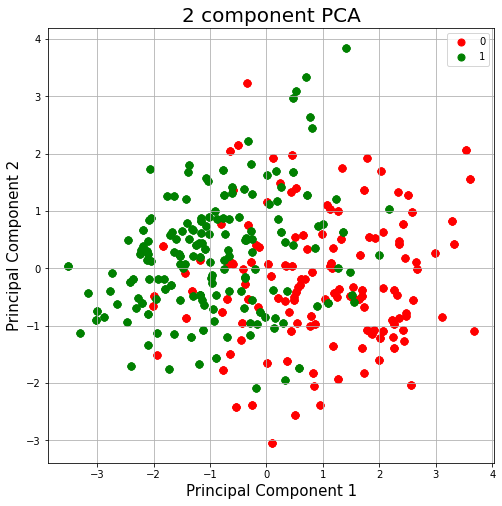

Figure 19- Data projected with respect to first two principal components


In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()
i+=1
print("Figure "+str(i)+"- Data projected with respect to first two principal components")

##**3. Data classification**

###**3.1 Train/test split**

To train and test the classifier model that will be developed, the dataset is split in two parts: the first, which contains 70% of the data, will be used for training the models, whereas the second (30% of the data) is used for testing them on completely new data. <br>


In [ ]:
#split train and test
X_train, X_test, y_train, y_test=train_test_split(heart_ds, labels, test_size=0.3, random_state=2)
X_trainpc, X_testpc, y_trainpc, y_testpc=train_test_split(heart_pca, labels, test_size=0.3, random_state=2)

For each model, to evaluate accuracy  over the training set and choose the best set of hyperparameters (when necessary), **K-fold crossvalidation** is used.<br>
K-fold cross validation is a tecnique used in order to avoid that a machine learning model overfits the data on which it was trained, producing a very high accuracy on such samples, but a lower one on testing data. The validation works in this way: the training set is partitioned in K subsets, then only K-1 of these subsets are used for training the model. The one left out, instead, is used for validation. This is performed K times, leaving out each time a different testing subset. Therefore K different models are generated and for each an accuracy value is computed. If these intermediate accuracies are quite different it means that the model has overfitted. Finally, the accuracies are averaged, getting a result that should be as much as possible indipendent from the original choice of the training data.
As already mentioned, this is also useful to perform a grid search over the hyperparameters: it is possible to crossvalidate models with different hyperparameters and eventually apply to the test set only the model that performed best in validation. This approach however is not completely followed here: in the next sections, test accuracy is evaluated also for model with non-optimal hyperparameter configurations, to have a complete overview also at test time. 
In this paper, K=10 is used, which is a common choice in the literature.



###**3.2 Classification:  Gaussian Naive Bayes**



Gaussian Naive Bayes is a classification algorithm based on Bayes Theorem. Considering the class label to infer $Y$ as a random variable which assumes value $k\in {\{0,1\}}$  and a data object to classify as a vector of random variables $X$, whose realization is a vector $x\in R^{F,1}$, Bayes theorem says that 
>$$P(Y=k|X=x)=\frac{P(X=x|Y=k)P(Y=k)}{P(X=x)}$$

This expression ca be employed to classify $X$, selecting the class to which it belongs as the one that maximizes probability $P(Y=k|X=x)$. Changing the notation this can be rewritten as
>$$P(Y=k|X=x)=\frac{\pi_{k}f_{k}(x)}{\sum_{i=1}^{K}\pi_{i}f_{i}(x)}$$

in which $\pi_{k}$ is the prior probability of class $k$ and $f_{k}(x)$ is the conditional density of $X$ in class $k$. <br>
Gaussian Naive Bayes simplifies this expression making two important assumption:


*   $f_{k}(x)$ is a Gaussian probability density function.
*   the features of $X$  are indipendent in each class, hence $f_{k}(x)$ can be easily computed as $f_{k}(x)=\prod_{j=1}^{F}f_{jk}(x_{j})$. 

Even if the naive assumption actually does not hold in many cases, nevertheless the classifier has proven efficient in several classification tasks. Table 4 shows the results when the classifier is applied to the heart disease problem.



In [ ]:
print("Table 5-Gaussian Naive Bayes results")
columns=['PCA', 'validation accuracy %', 'test accuracy %']
results_df=pd.DataFrame(columns=columns)
##without PCA

#validation accuracy
nb=GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=10)
nb_val_acc=np.mean(scores)*100
#print("Naive Bayes validation accuracy %.2f%%" % nb_val_acc)


#test accuracy
nb.fit(X_train, y_train)
nb_test_predictions=nb.predict(X_test)
nb_test_acc=accuracy_score(y_true=y_test, y_pred=nb_test_predictions)*100
#print("Naive Bayes test accuracy %.2f%%"% nb_test_acc)
results_df=results_df.append({'PCA':'no', 'validation accuracy %':nb_val_acc, 'test accuracy %':nb_test_acc},ignore_index=True)

#with PCA
#validation accuracy
nb_pca=GaussianNB()
scores = cross_val_score(nb_pca, X_trainpc, y_trainpc, cv=10)
nb_val_acc=np.mean(scores)*100
#print("Naive Bayes validation accuracy with PCA %.2f%%" % nb_val_acc)

#test accuracy
nb_pca.fit(X_trainpc, y_trainpc)
nb_test_predictions_pca=nb_pca.predict(X_testpc)
nb_test_acc=accuracy_score(y_true=y_testpc, y_pred=nb_test_predictions_pca)*100
#print("Naive Bayes test accuracy with PCA %.2f%%"% nb_test_acc)
results_df=results_df.append({'PCA':'yes', 'validation accuracy %':nb_val_acc, 'test accuracy %':nb_test_acc},ignore_index=True)
display(results_df.round(2))

Table 5-Gaussian Naive Bayes results


,PCA,validation accuracy %,test accuracy %
0,no,82.85,83.77
1,yes,83.95,83.12


As it can be observed, the model performes slightly better when using principal components on the training set, but at the testing time the results are practically the same. 

###**3.3 Classification: K-NN**


K-Nearest Neighbours is the easiest machine learning algorithm for classification. It is based on the idea of assigning to an unlabelled data object the same label of the closest $K$ objects. $K$ is an hyperparameter to tune and it is in general an odd number: indeed, when $K>1$ the most common strategy to select the class is majority voting, hence this choice is done to avoid ambiguous situations. For heart dataset values 1,3,5,7 were considered.
To define the K-closest objects different concepts of distance can be employed, in this paper the following were considered ($x,y$ being two vectors in $R^{F,1}$):


*   Euclidean: $$d(x,y)=\sqrt{\sum_{i}^{F}(x_{i}-y_{i}})^{2}$$
*   Manhattan: $$d(x,y)=\sum_{i}^{F}|x_{i}-y_{i}|$$
*   Chebyshev: $$d(x,y)=\max_{i}^{}|x_{i}-y_{i}|$$




In [ ]:
columns=['K', 'metric', 'PCA', 'validation accuracy %', 'test accuracy %']
results_df=pd.DataFrame(columns=columns)
best_acc=0
best_acc_pca=0
for (k,m) in list(it.product([1,3,5,7], ['euclidean', 'manhattan', 'chebyshev'])):
    ##without PCA

    #validation accuracy
    knn=KNN(k, metric=m)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    knn_val_acc=np.mean(scores)*100
    #print("KNN validation accuracy %.2f%%, with k=%d,  metric=%s" % (knn_val_acc,k, m))
    
    #test accuracy
    knn.fit(X_train, y_train)
    test_predictions=knn.predict(X_test)
    knn_test_acc=accuracy_score(y_true=y_test, y_pred=test_predictions)*100
    if best_acc<knn_test_acc:
        knn_best=knn
        best_acc=knn_test_acc
    #print("KNN test accuracy %.2f%%, with k=%d,  metric=%s" % (knn_test_acc,k, m))
    
    results_df=results_df.append({'K':k, 'metric':m, 'PCA':'no', 'validation accuracy %':knn_val_acc, 'test accuracy %':knn_test_acc},ignore_index=True)
    
    #with PCA
    
    #validation accuracy
    knn=KNN(k, metric=m)
    scores = cross_val_score(knn, X_trainpc, y_trainpc, cv=10)
    knn_val_acc=np.mean(scores)*100
    #print("(PCA)KNN validation accuracy %.2f%%, with k=%d,  metric=%s" % (knn_val_acc,k, m))
    
    #test accuracy
    knn.fit(X_trainpc, y_trainpc)
    test_predictions=knn.predict(X_testpc)
    knn_test_acc=accuracy_score(y_true=y_testpc, y_pred=test_predictions)*100
    if best_acc_pca<knn_test_acc:
        knn_best_pca=knn
        best_acc_pca=knn_test_acc
    #print("(PCA)KNN test accuracy %.2f%%, with k=%d,  metric=%s" % (knn_test_acc,k, m))
    
    results_df=results_df.append({'K':k, 'metric':m, 'PCA':'yes', 'validation accuracy %':knn_val_acc, 'test accuracy %':knn_test_acc}, ignore_index=True)
print("Table 6- K-Nearest Neighbours results")
display(results_df.round(2))



Table 6- K-Nearest Neighbours results


,K,metric,PCA,validation accuracy %,test accuracy %
0,1,euclidean,no,97.78,96.75
1,1,euclidean,yes,98.19,96.75
2,1,manhattan,no,98.33,97.73
3,1,manhattan,yes,97.91,97.73
4,1,chebyshev,no,97.08,93.51
5,1,chebyshev,yes,98.61,96.43
6,3,euclidean,no,88.57,89.29
7,3,euclidean,yes,88.56,91.56
8,3,manhattan,no,91.21,91.88
9,3,manhattan,yes,88.71,90.91


As it can be observed from Table 6, whatever the concept of distance we consider, the best K is 1, for which a very high accuracy (above 96%) is reached.  
As K increases the accuracy starts dropping. On the training set the best result is obtained with PCA and Chebyshev distance; on testing the best result is for Manhattan distance, either with or without PCA. However what really does a difference in terms of performances is K, the 3 definitions of distance and the use of principal components do not alter significantly the results (around 1% in most of the cases).

###**3.4 Classification: Simple Decision Tree**



Simple Decision Tree is a popular approach that is well known for its high interpretability and similarity to the way in which human beings take decisions. On the other hand, it is an algorithm that tends to achieve lower performances and, most importantly, tends to overfit quite easily the training data. <br>
To build a decision tree the idea is to partition the predictor space (in this case $R^{F,1}$) in $J$ decision regions, which are usually hyperdimensional rectangles (boxes) for simplicity. When a data object falls in one of the regions, it is classified according to which class the majority of the samples in that region belong to.  The partition is performed considering once at a time each feature and performing a binary (also multinomial is possible) split over its possible values. Once all the attributes have been considered or another stopping condition is met, the algorithm stops and the tree is complete. <br>
The attributes to perform the splits are not picked in a random order, but they are selected using a greedy approach based on some "relevance" criterion: a common choice is considering first the ones that provide the largest decrease in impurity in the regions generated after the split, being impurity defined as a measure of the heterogeneity of the class labels in a region. A region with samples belonging all to the same class is completely pure, hence no more splits over that region are required, which is what the algorithms try to achieve in the leaves of the tree.   
A common measure of purity that is used to build decision trees is Gini index which is defined as:
>$$ G=\sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$$

in which $\hat{p}_{mk}$ is the proportion of training observations
in the $m^{th}$ region that are from the $k^{th}$ class. Therefore a low value of Gini Index means that the mth region is very pure. <br>
As already mentioned, however, this approach tends to build very deep trees that overfit the training samples and are not general enough to adapt to the testing data, resulting in very low test accuracy. There are many strategies to solve this issue, pruning a posteriori the tree or interrupting with some early stopping condition its construction.  A common strategy to avoid too deep tree is to define a maximum depth the tree can reach. In the next cell, different trees are built setting the maximum depth to 3,5,7,9. When max_depth=None automatically the sklearn tree function identifies the best value for the parameter.  

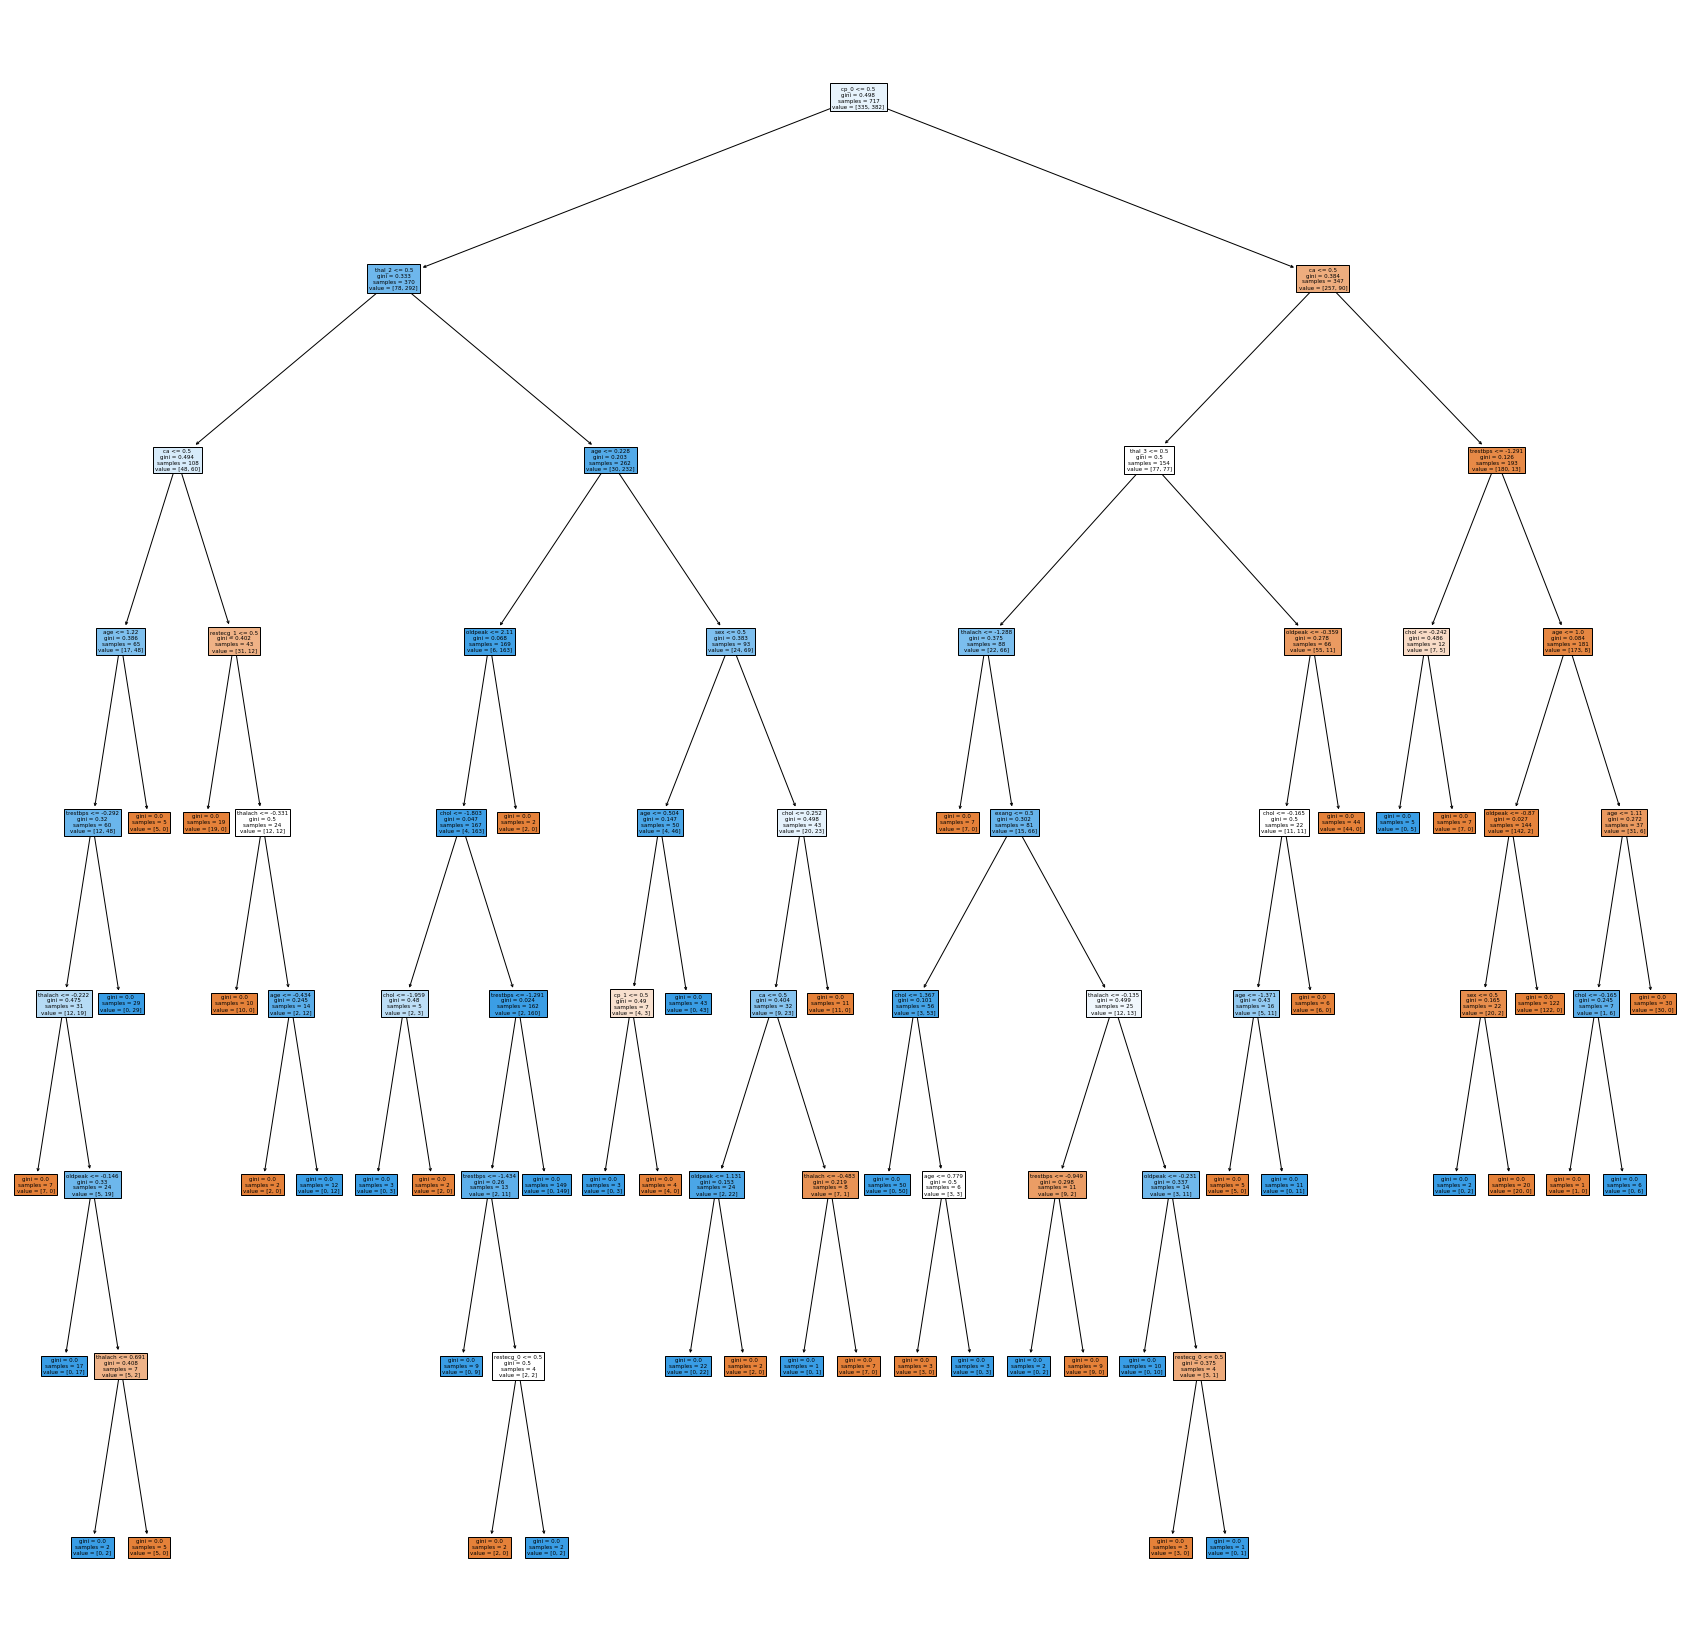

Figure 20- Decision tree without PCA with depth None


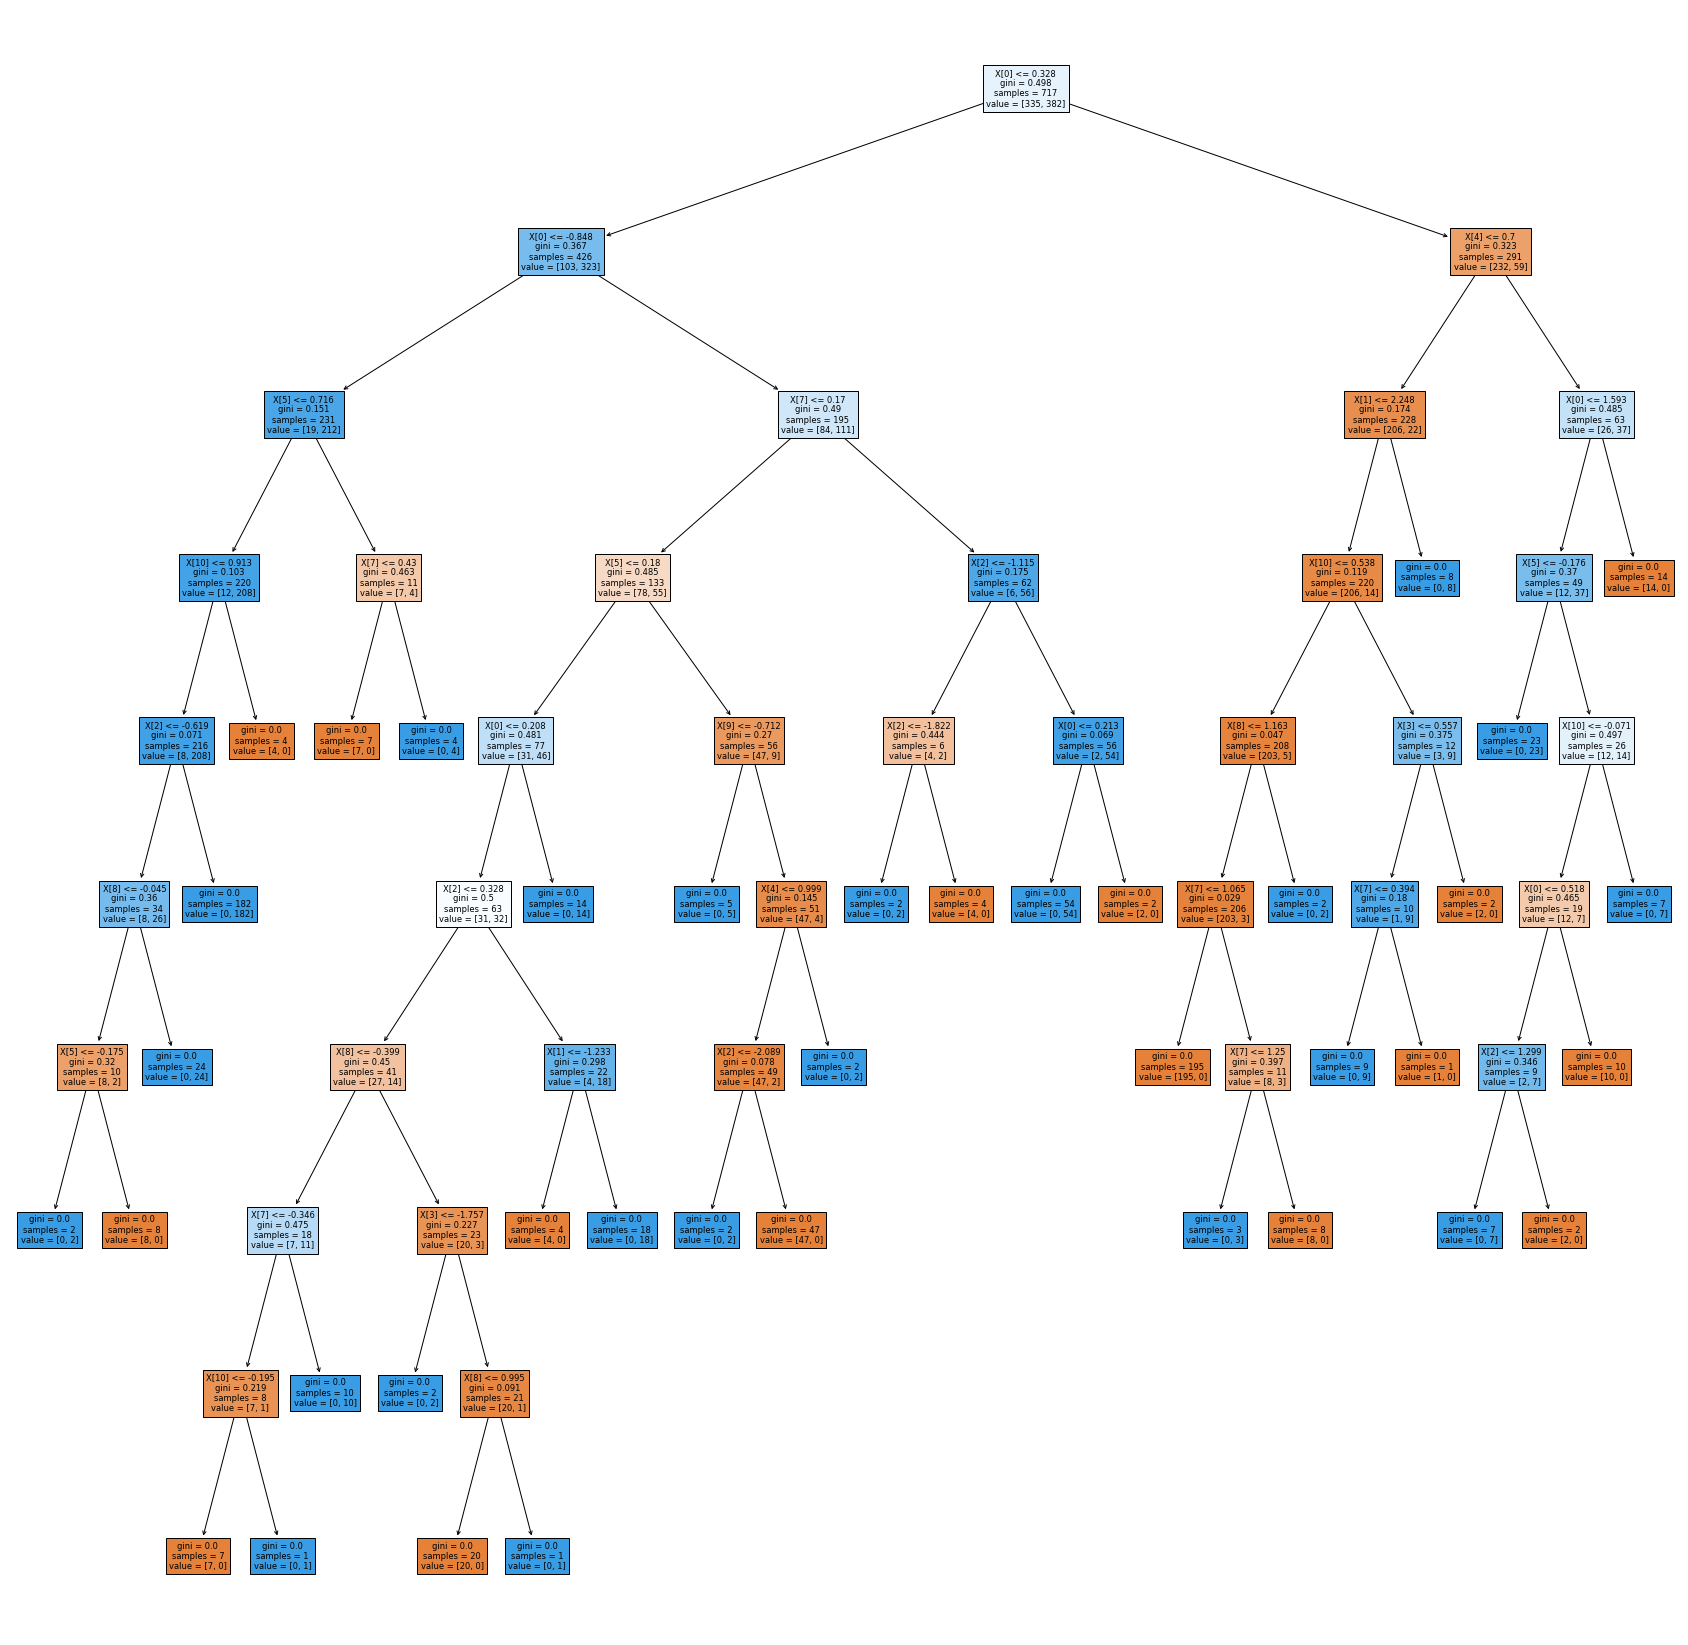

Figure 20- Decision tree with PCA with depth None


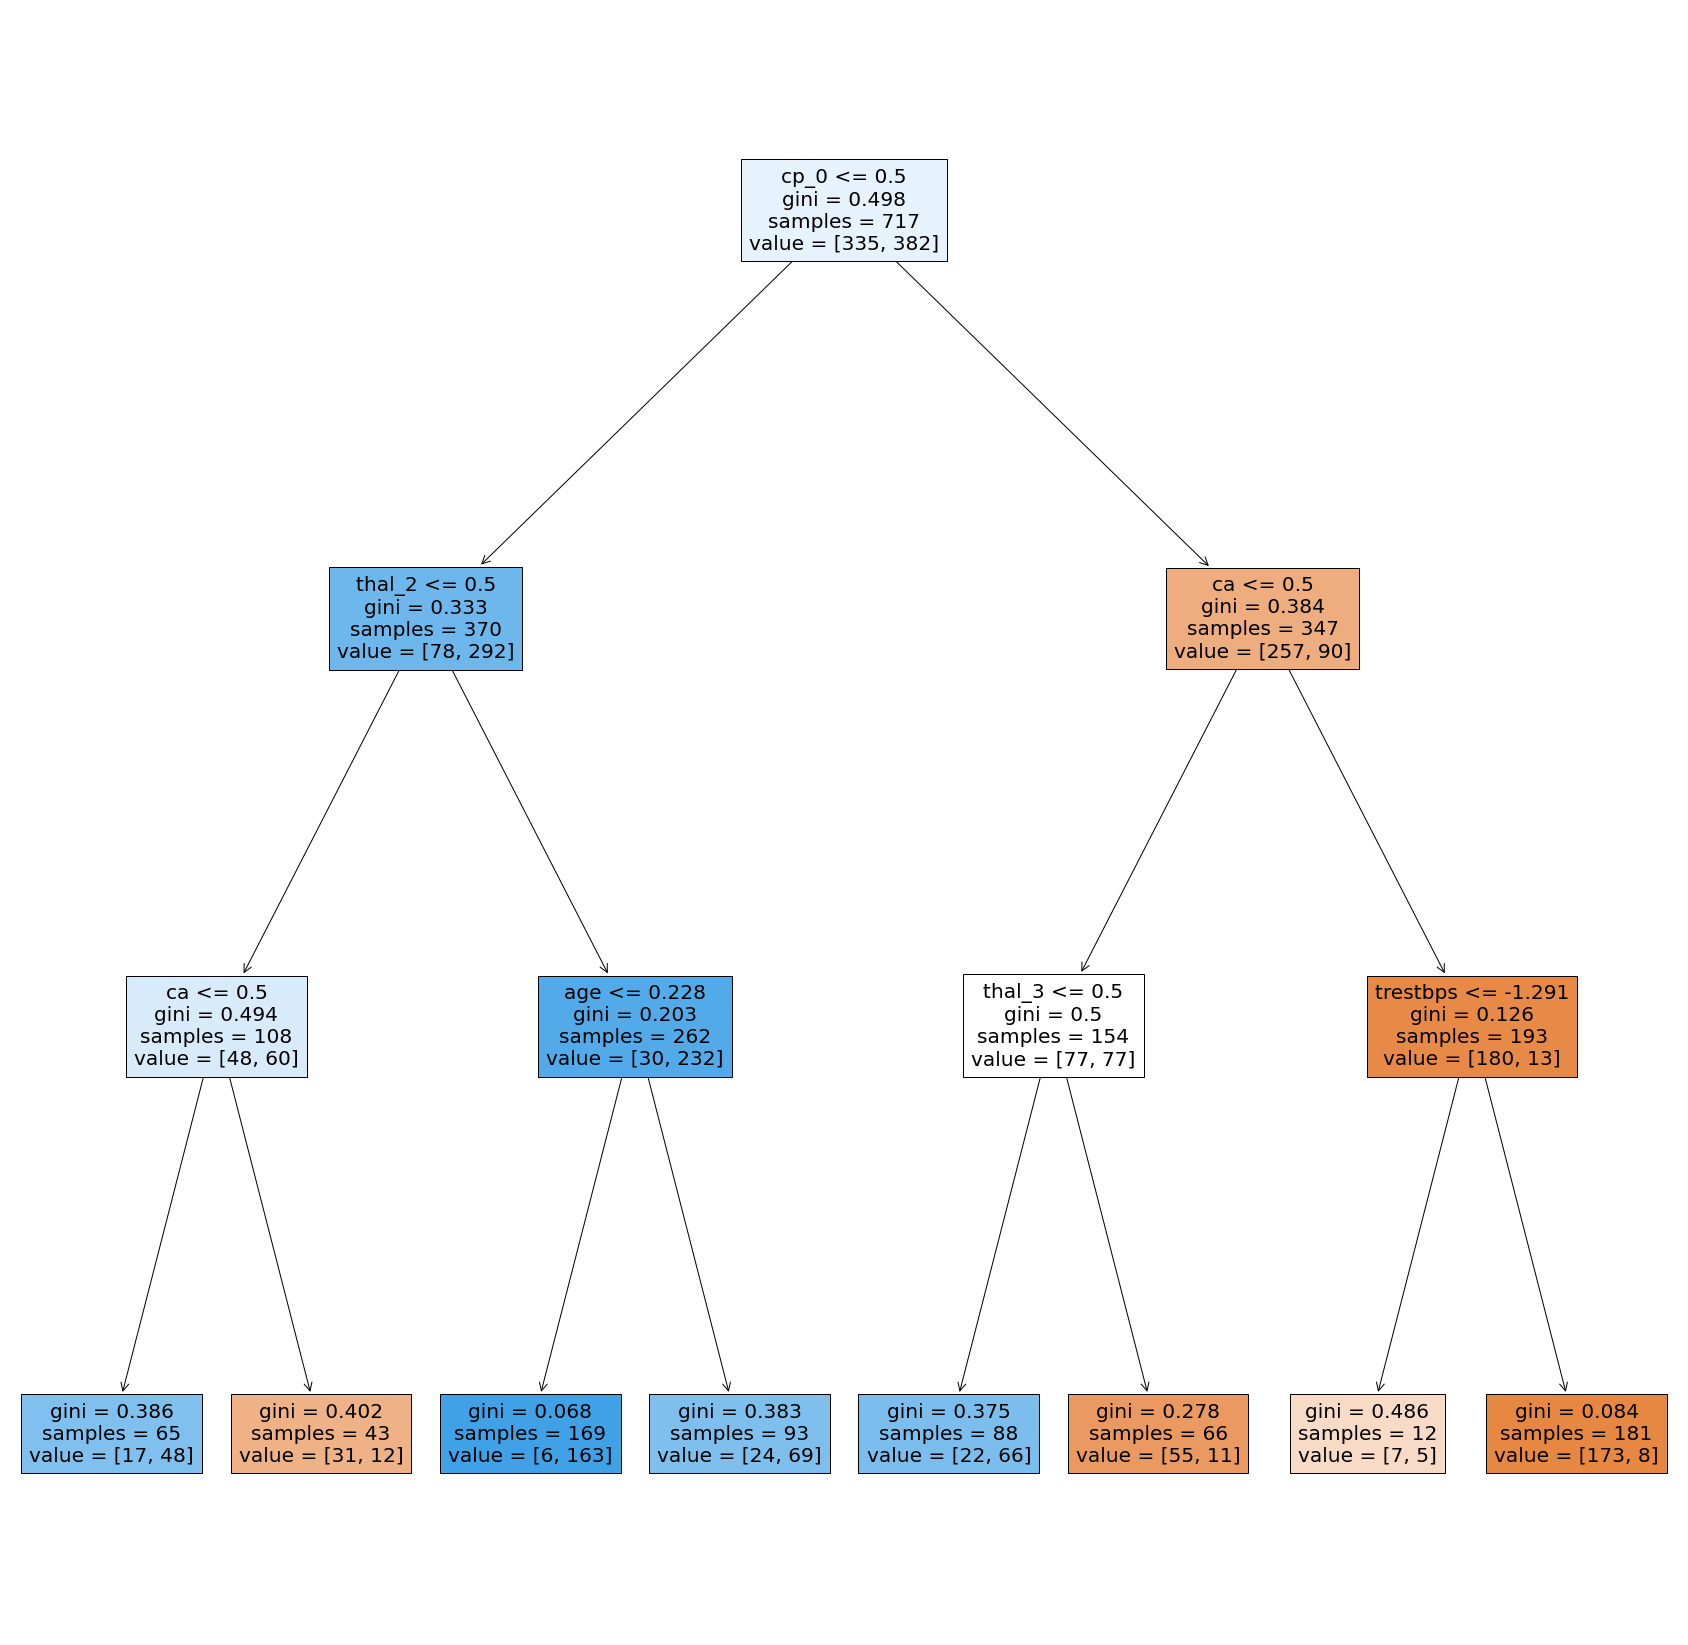

Figure 21- Decision tree without PCA with depth 3


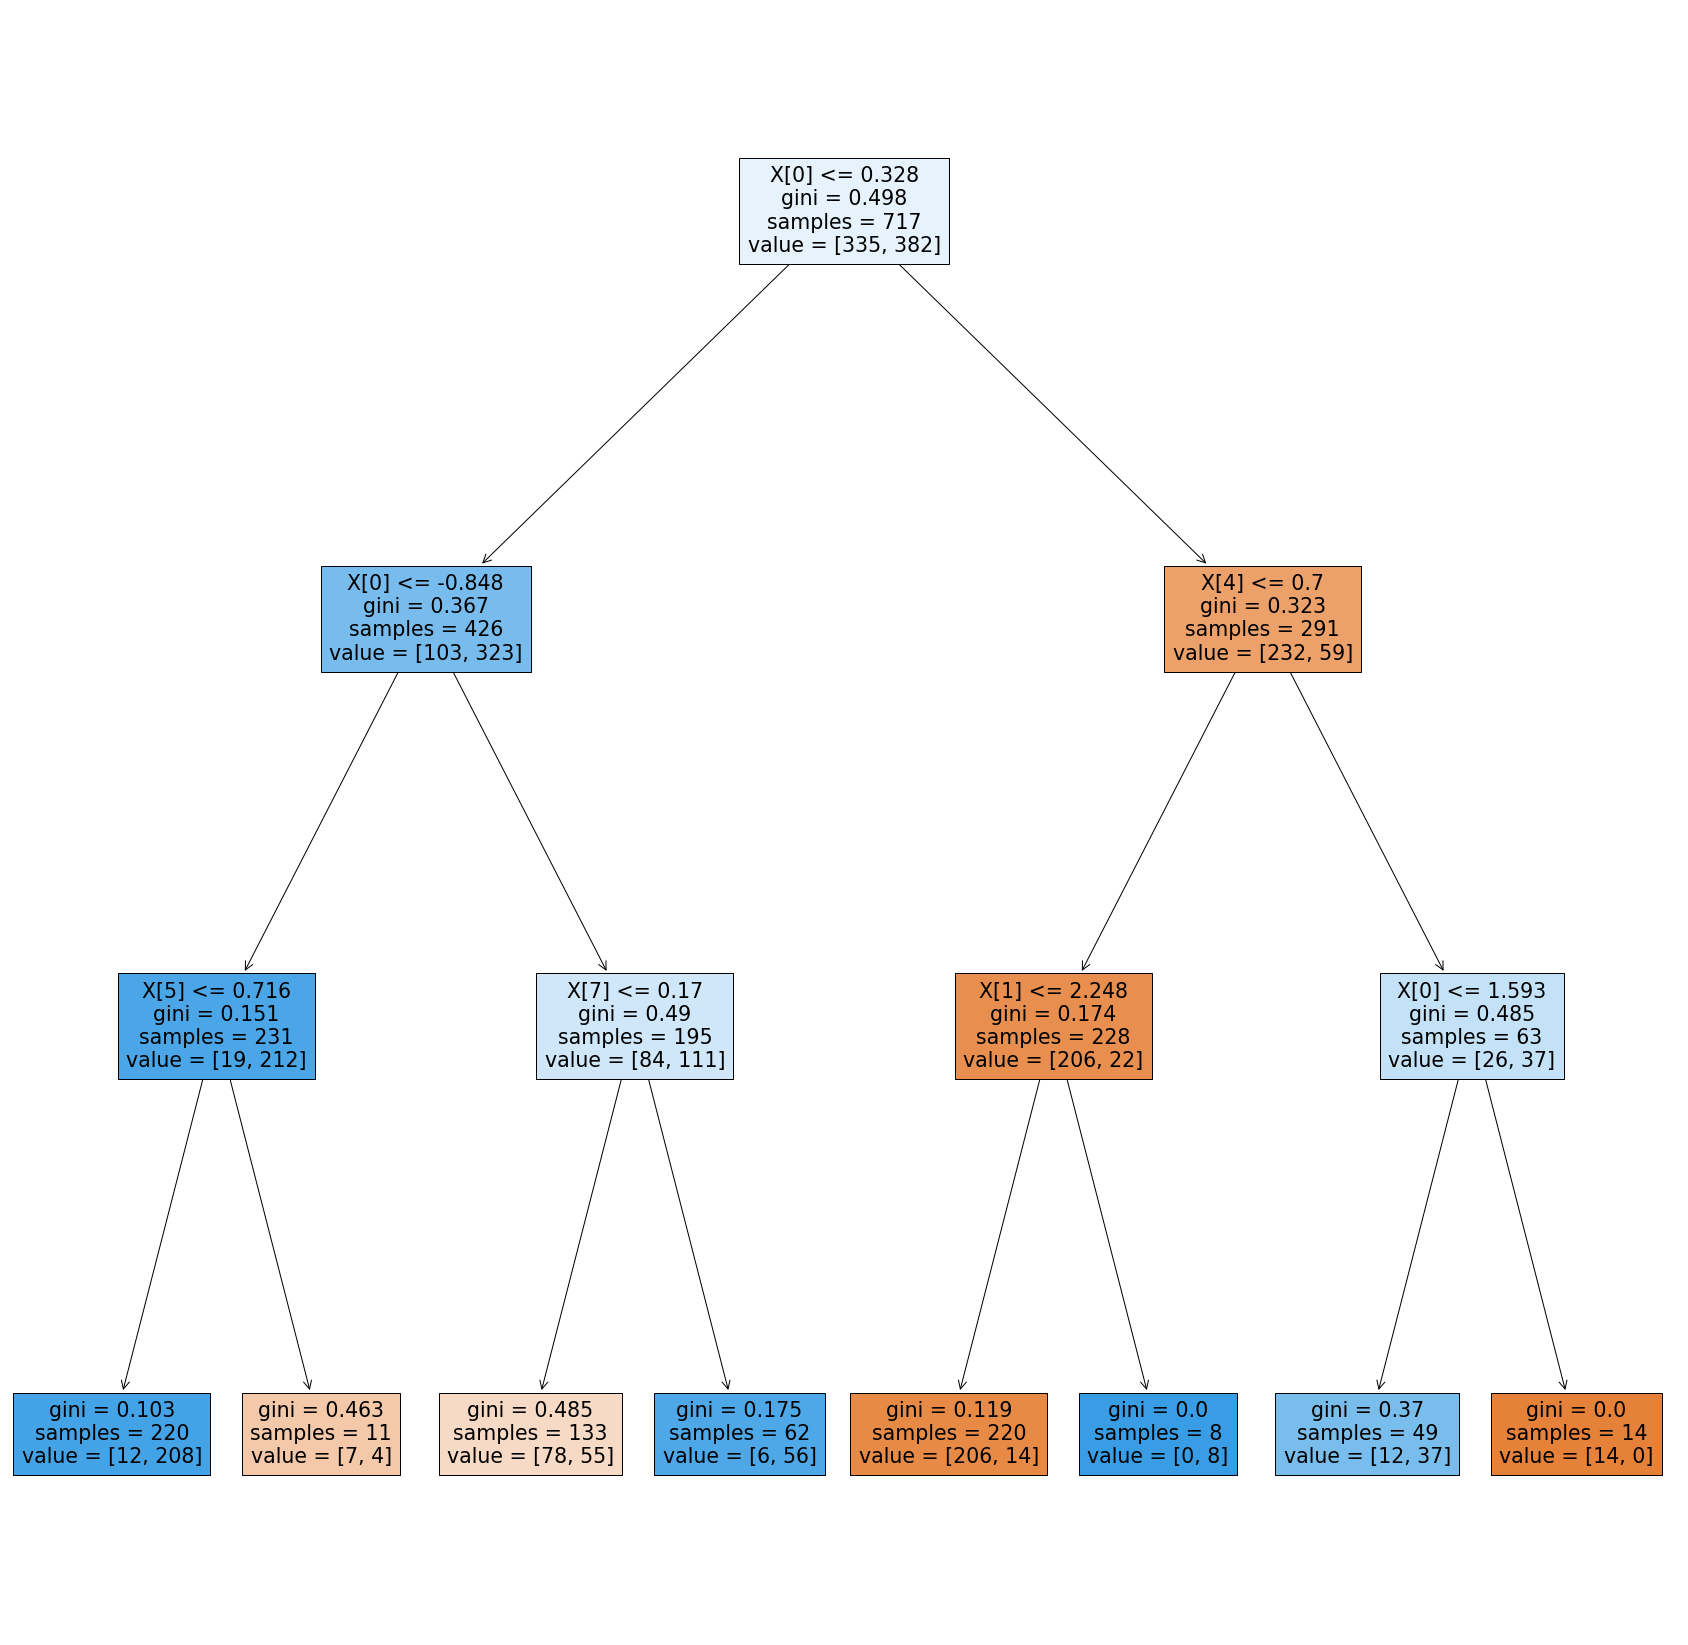

Figure 21- Decision tree with PCA with depth 3


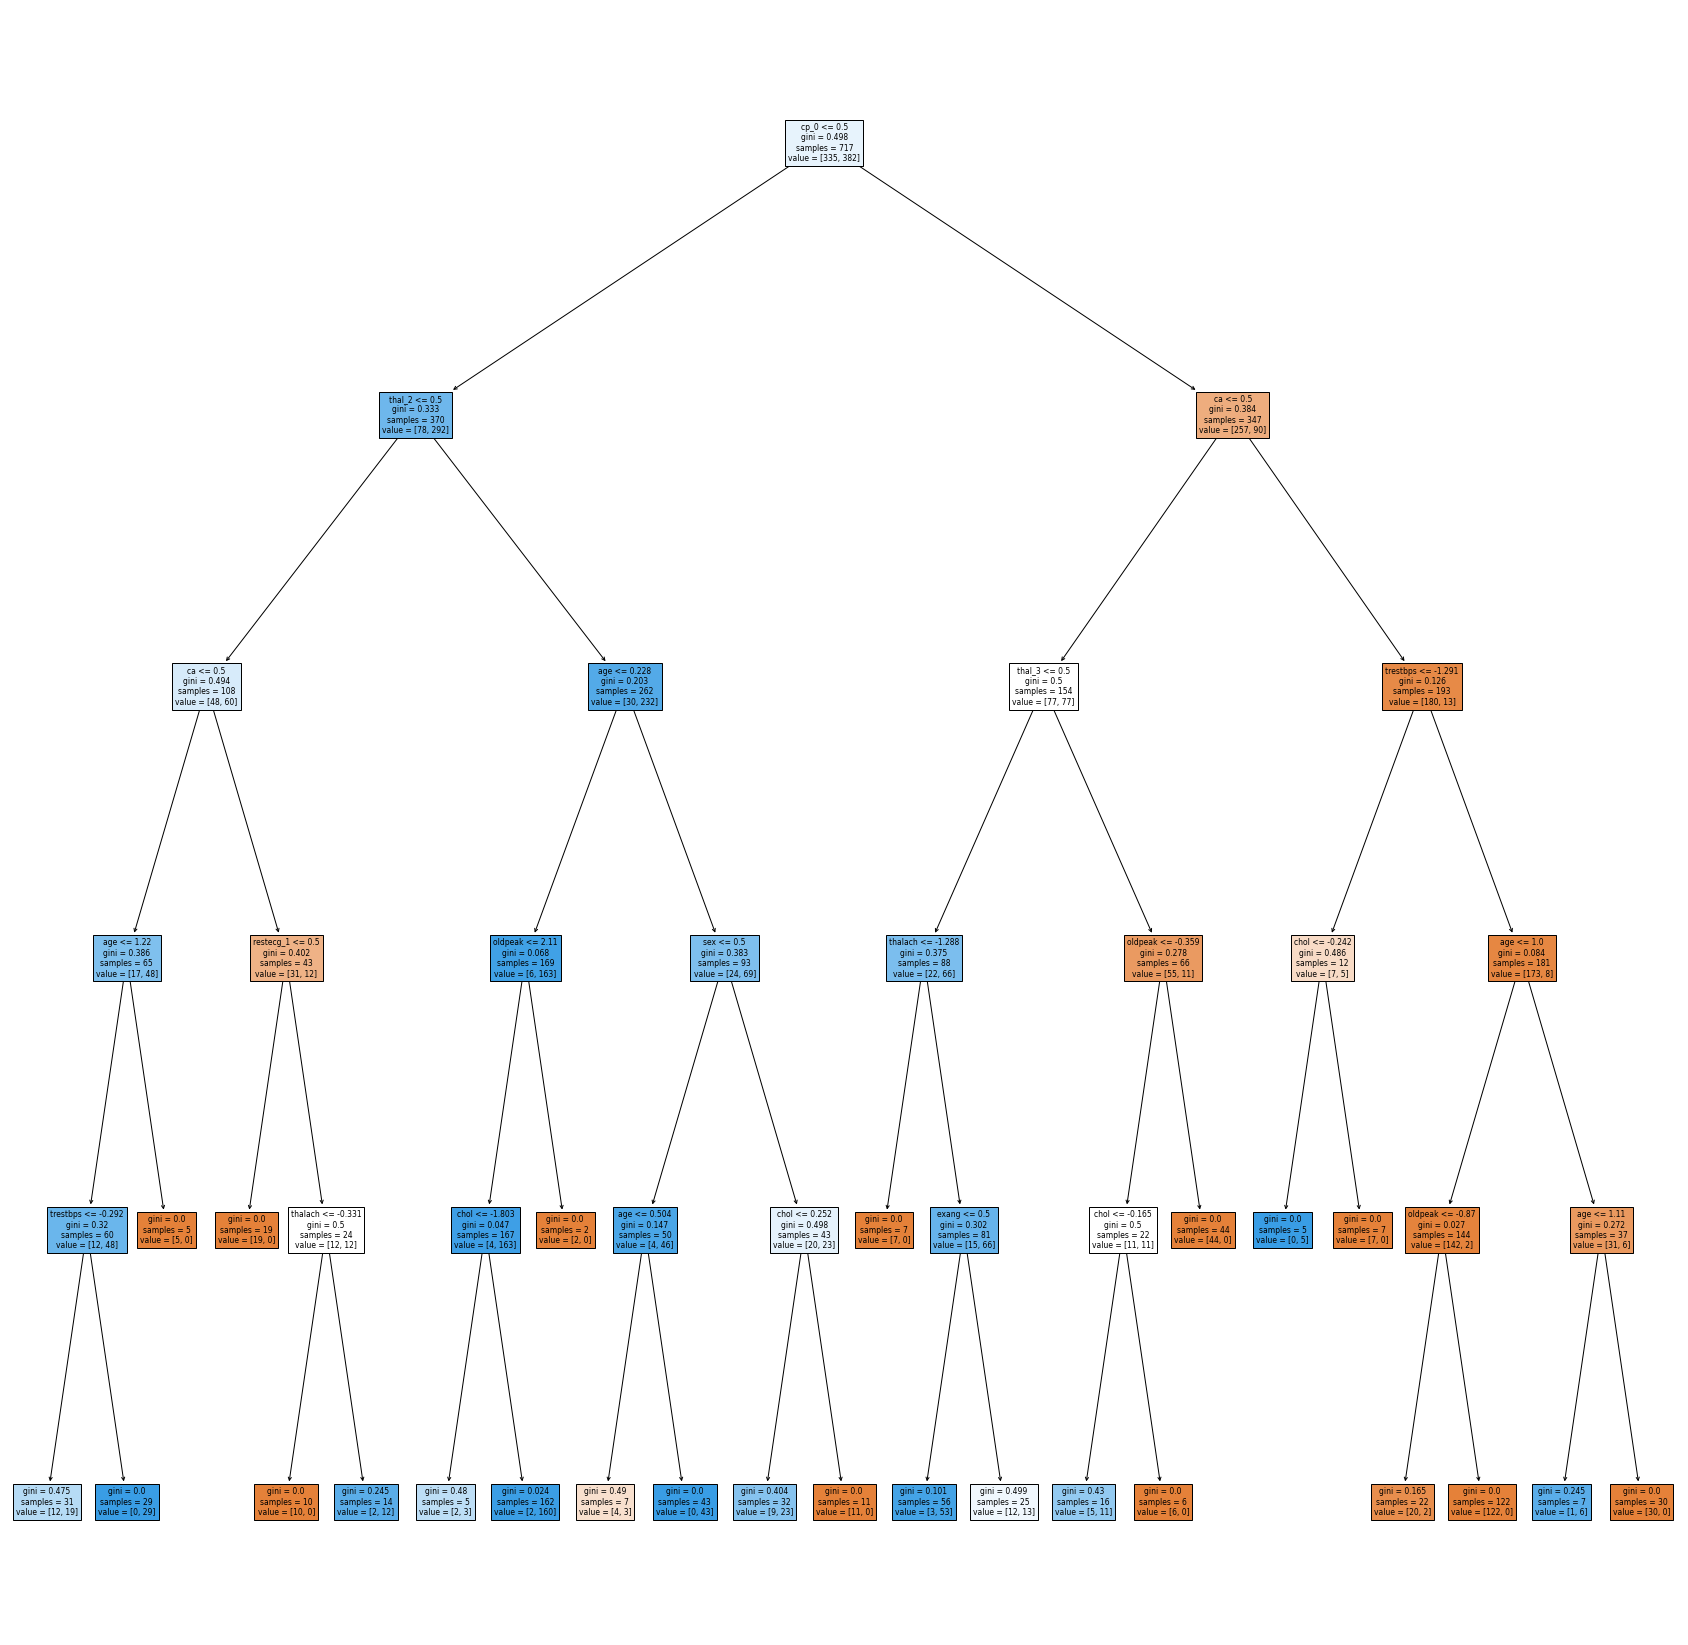

Figure 22- Decision tree without PCA with depth 5


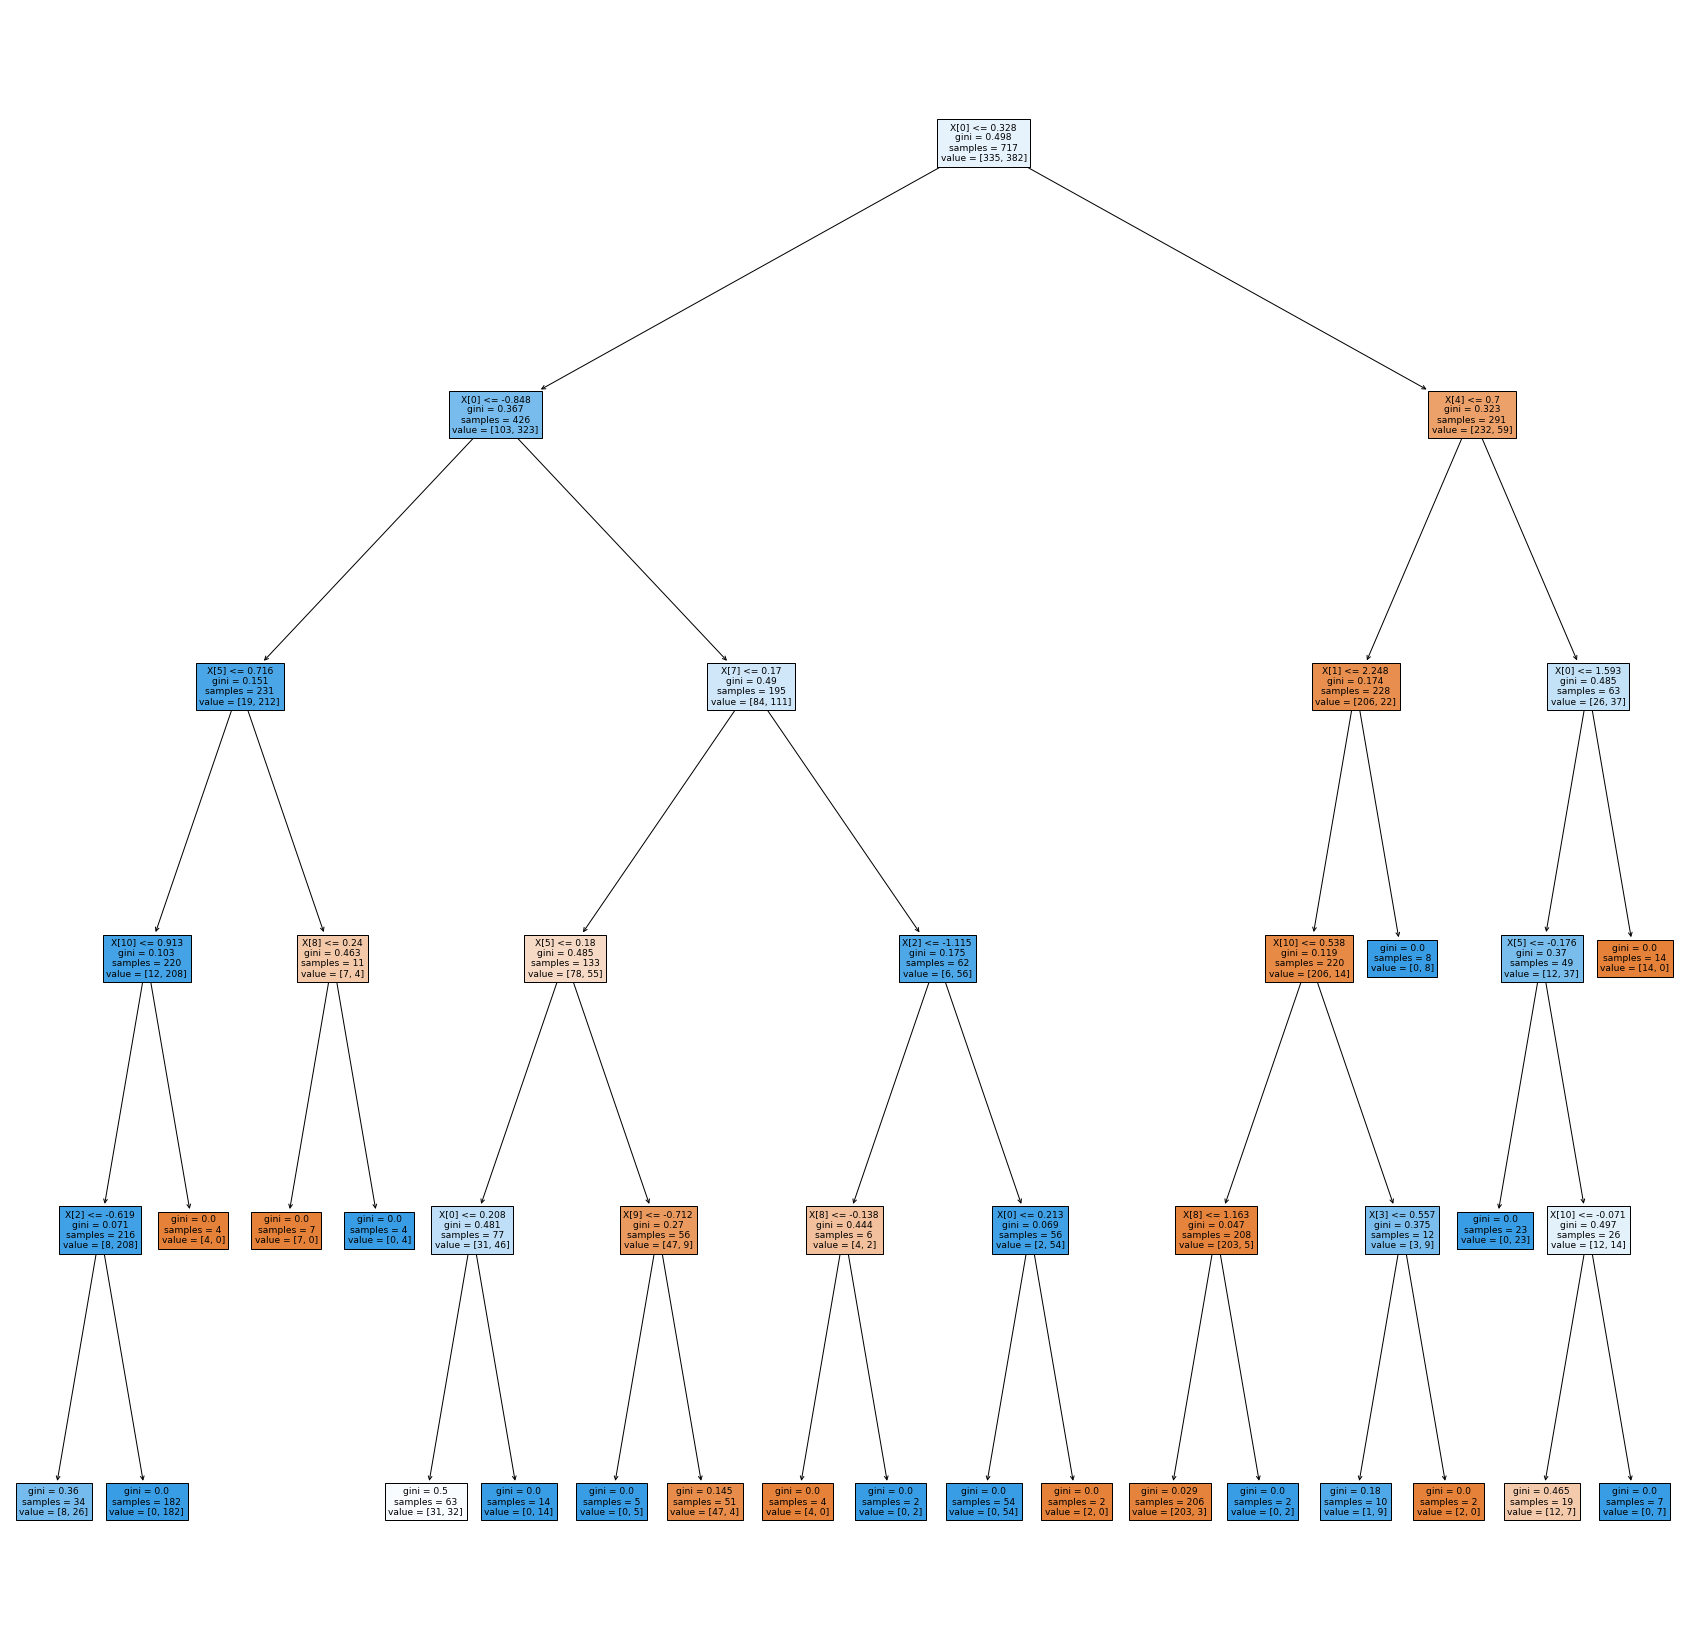

Figure 22- Decision tree with PCA with depth 5


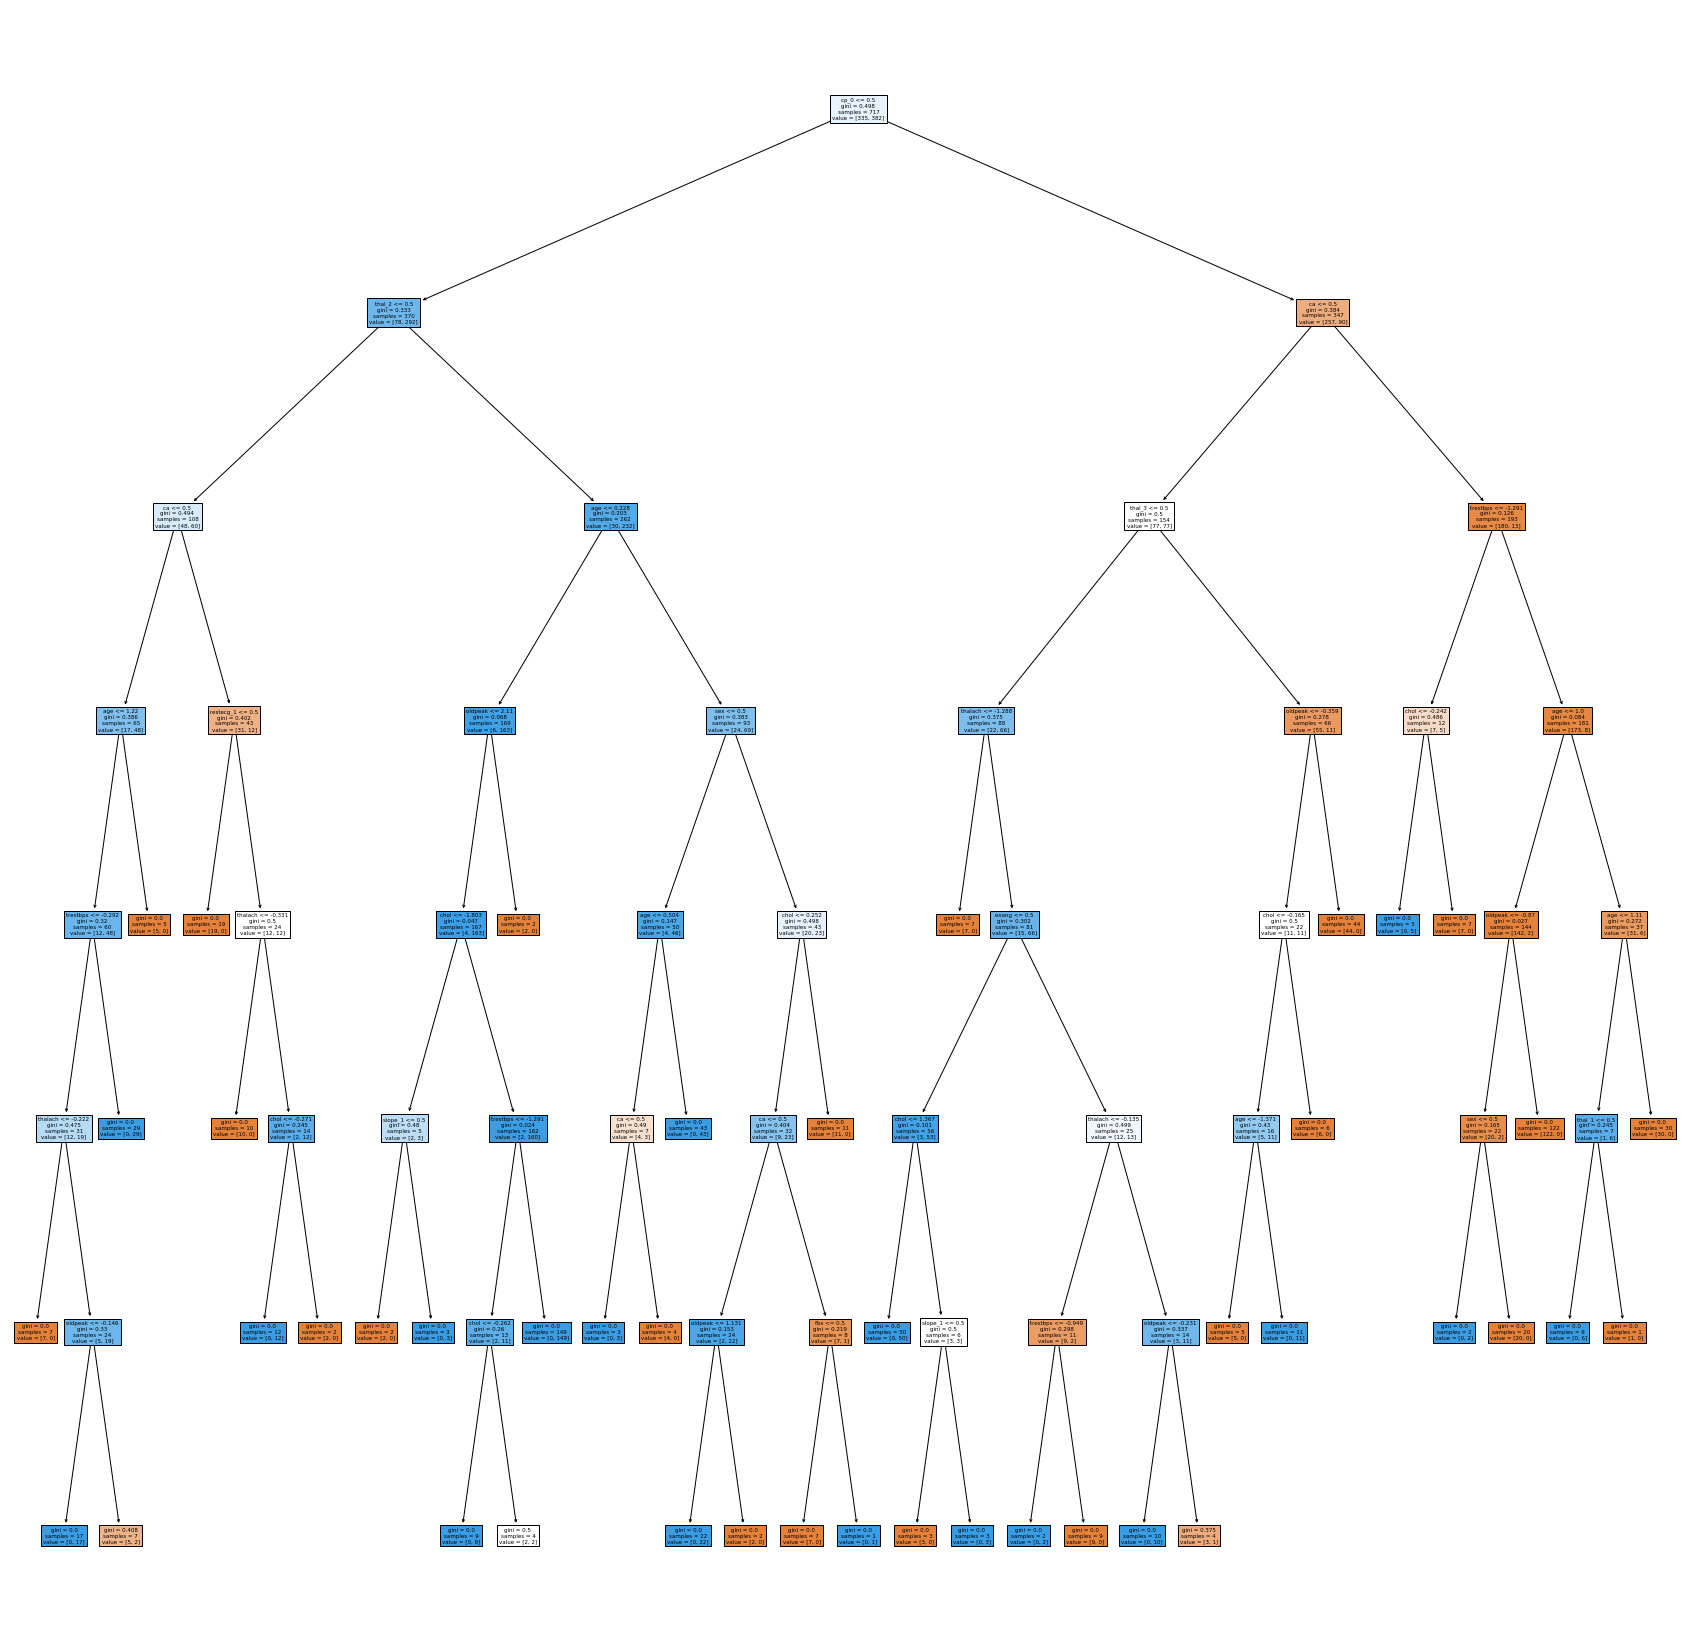

Figure 23- Decision tree without PCA with depth 7


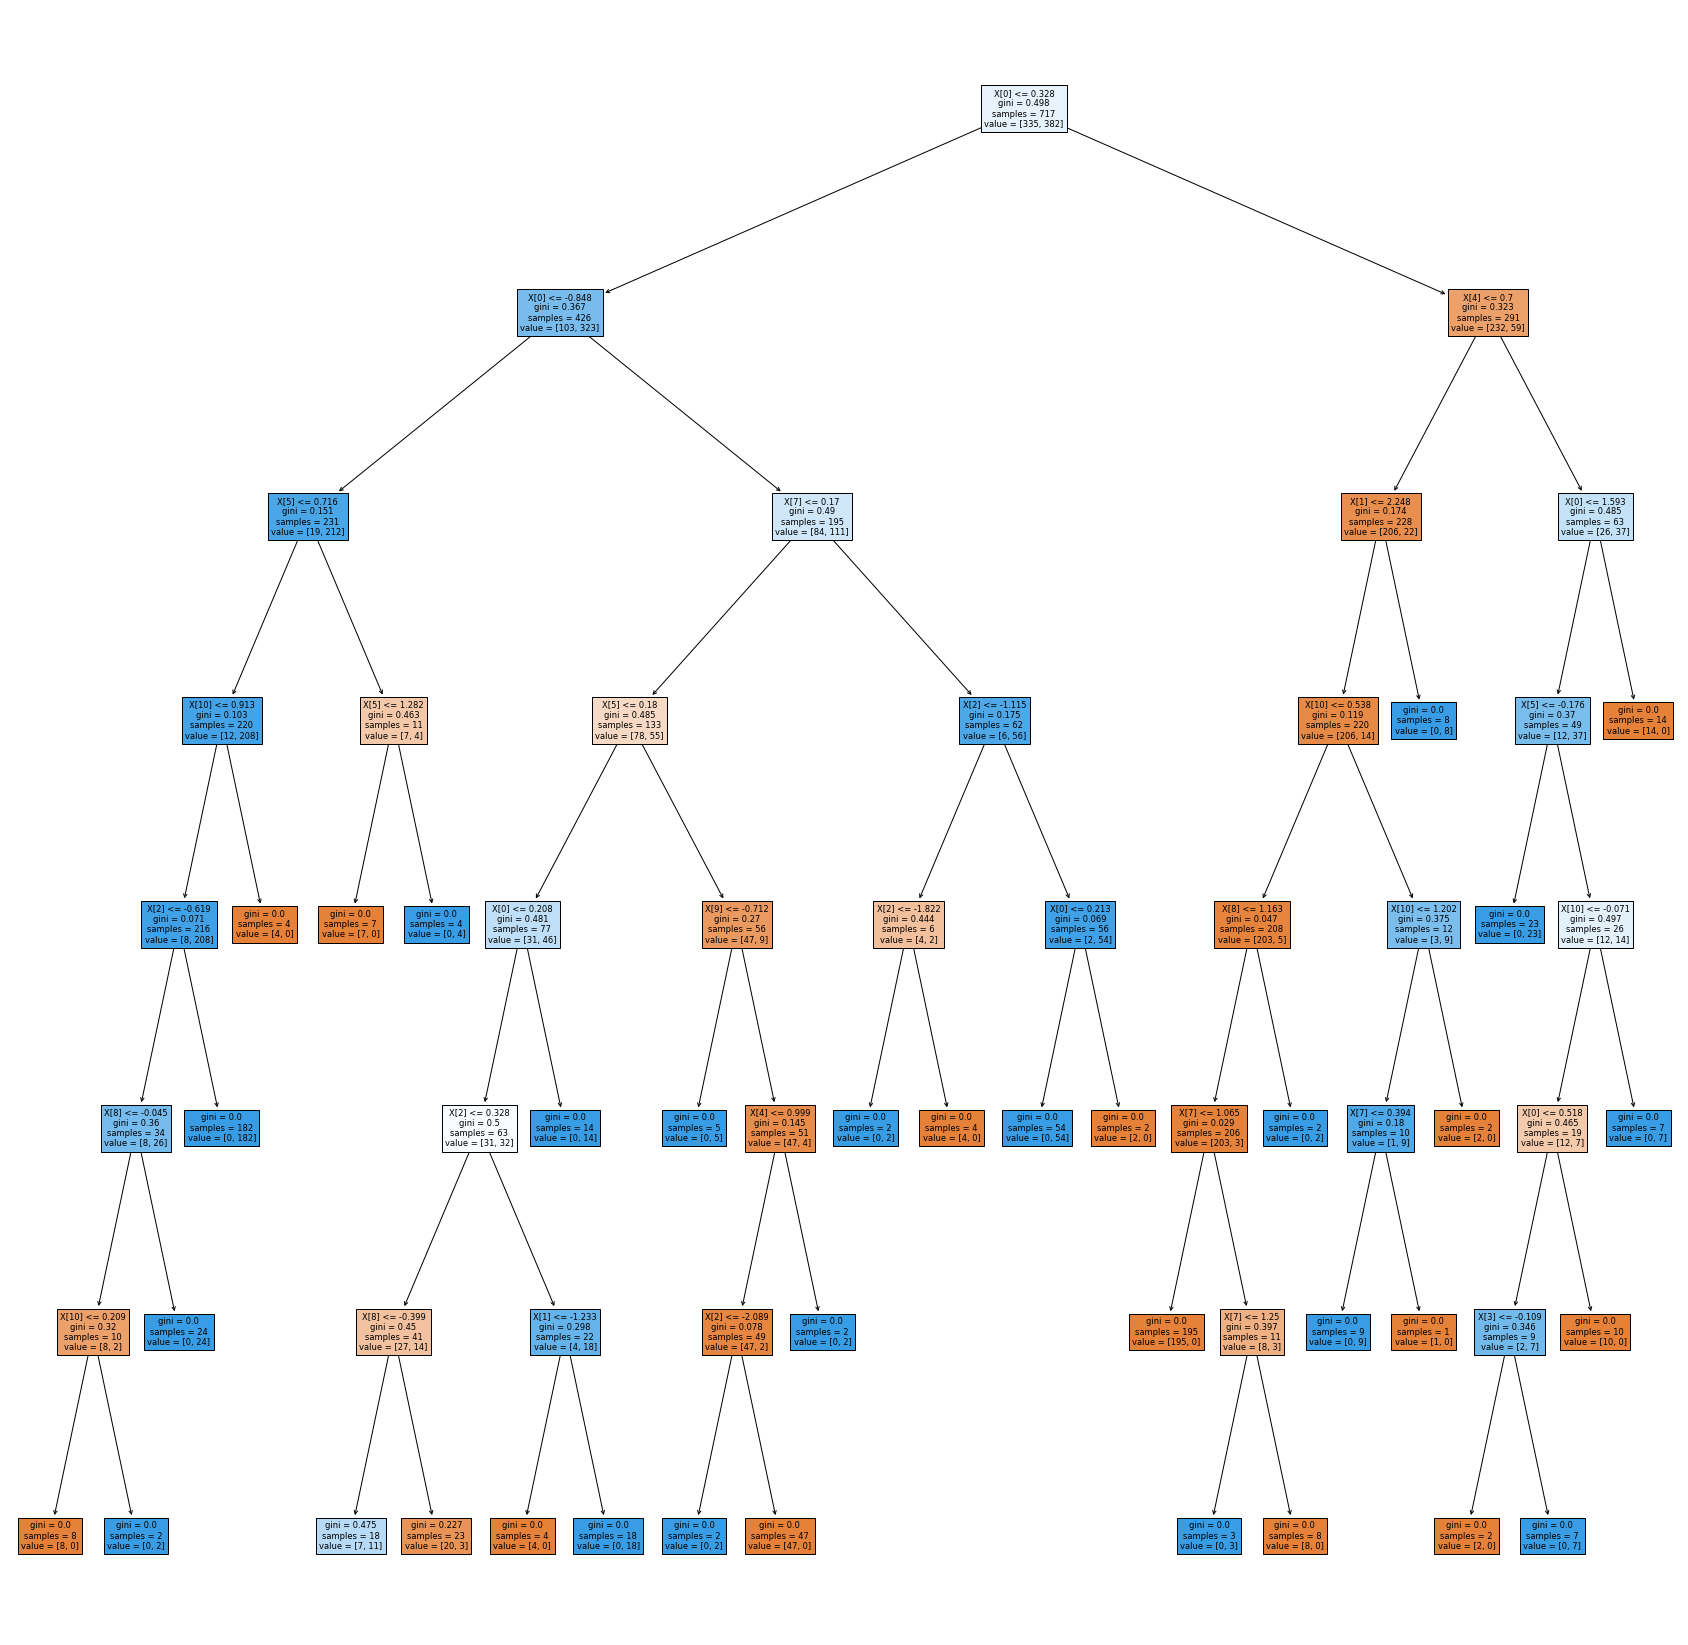

Figure 23- Decision tree with PCA with depth 7


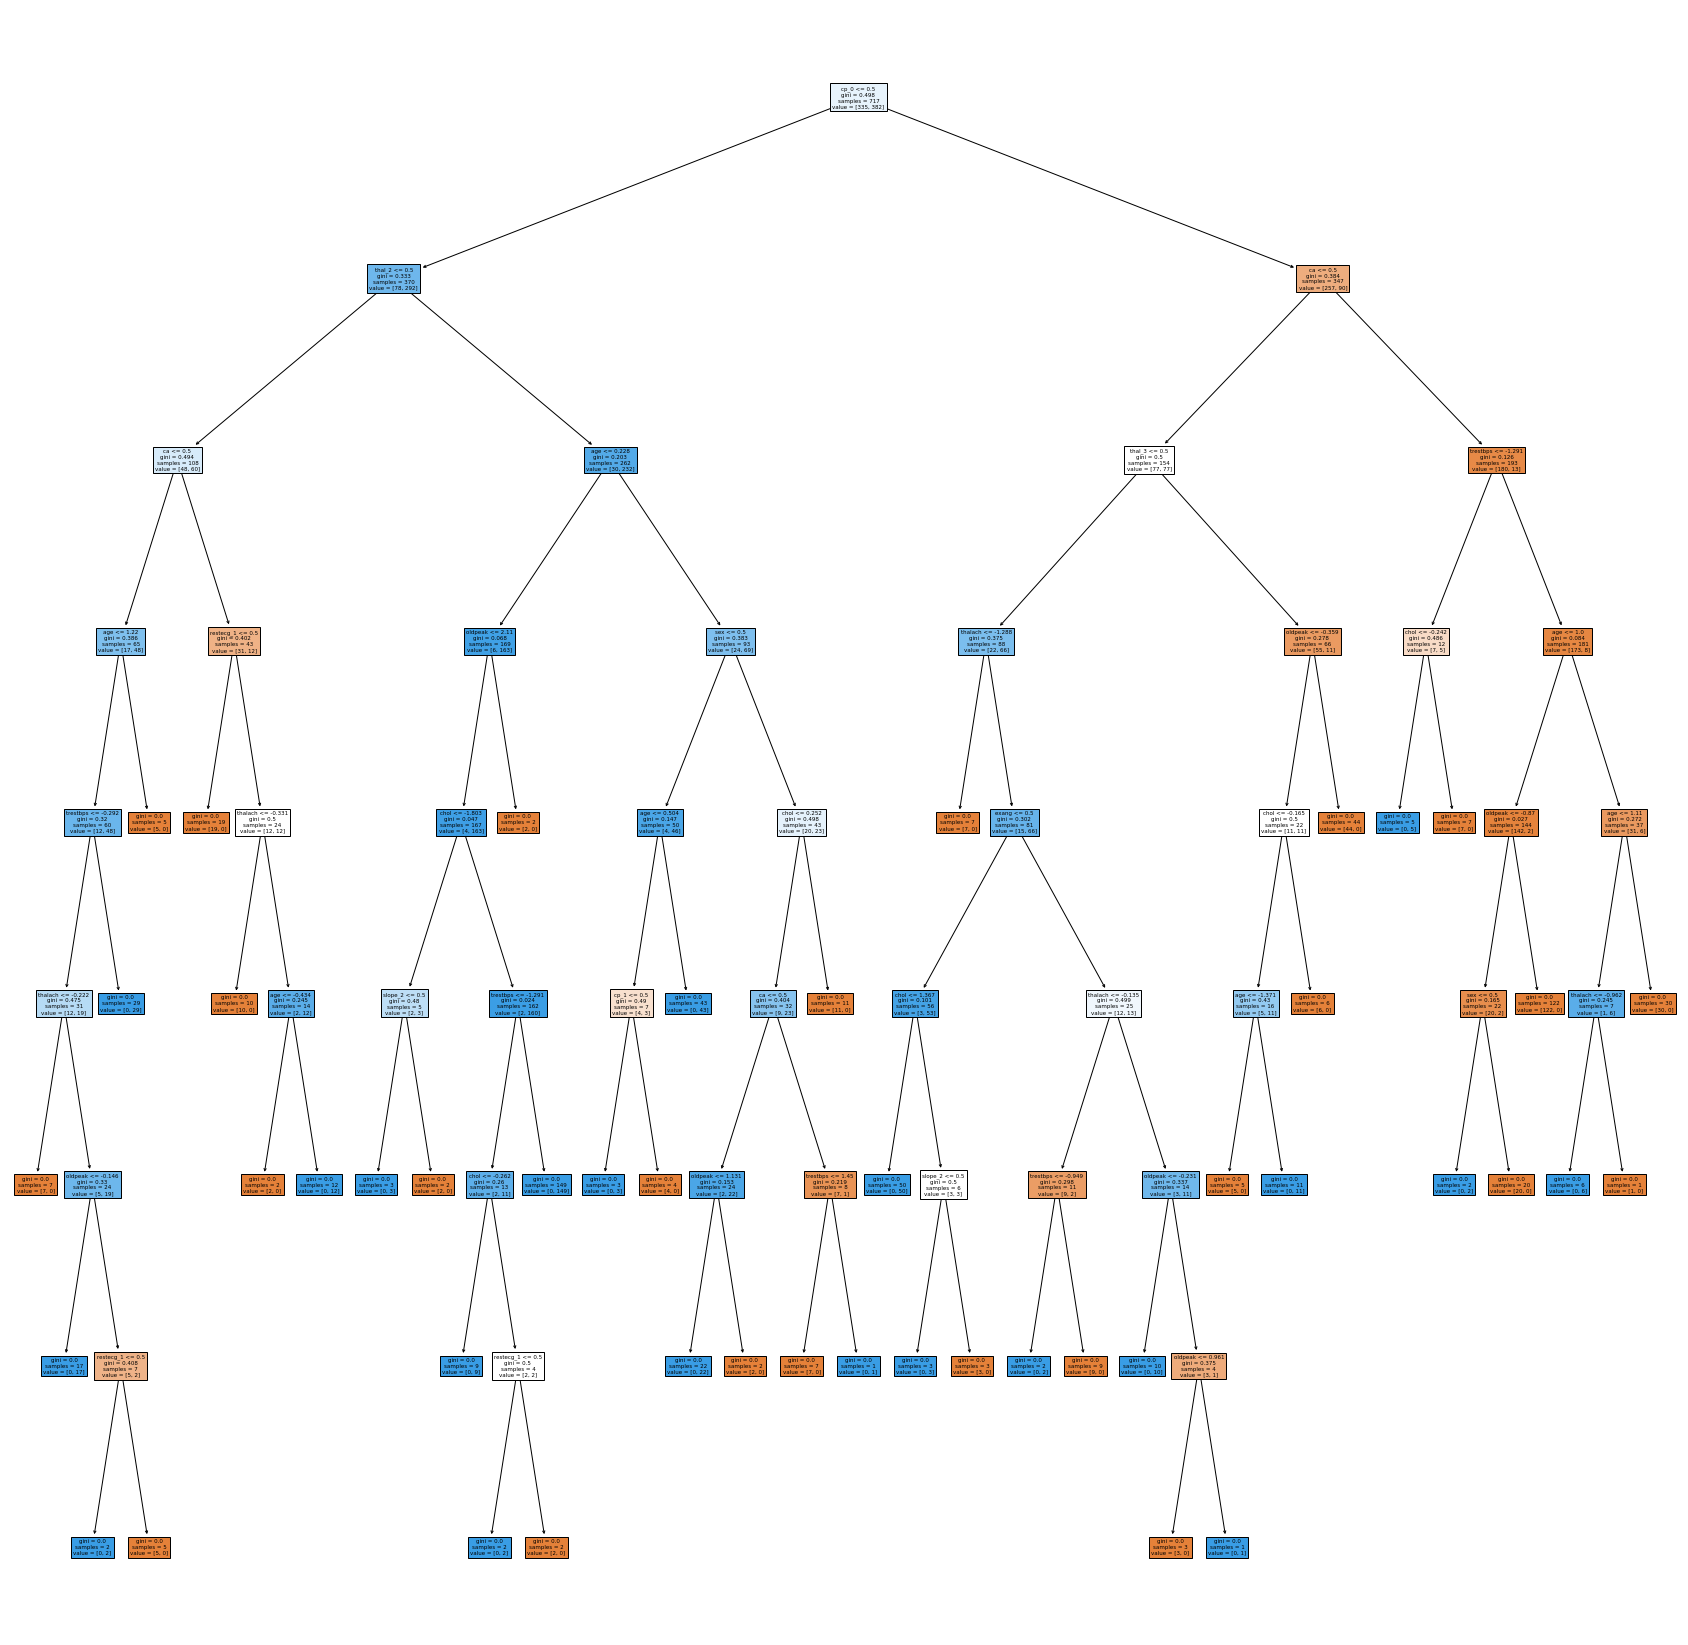

Figure 24- Decision tree without PCA with depth 9


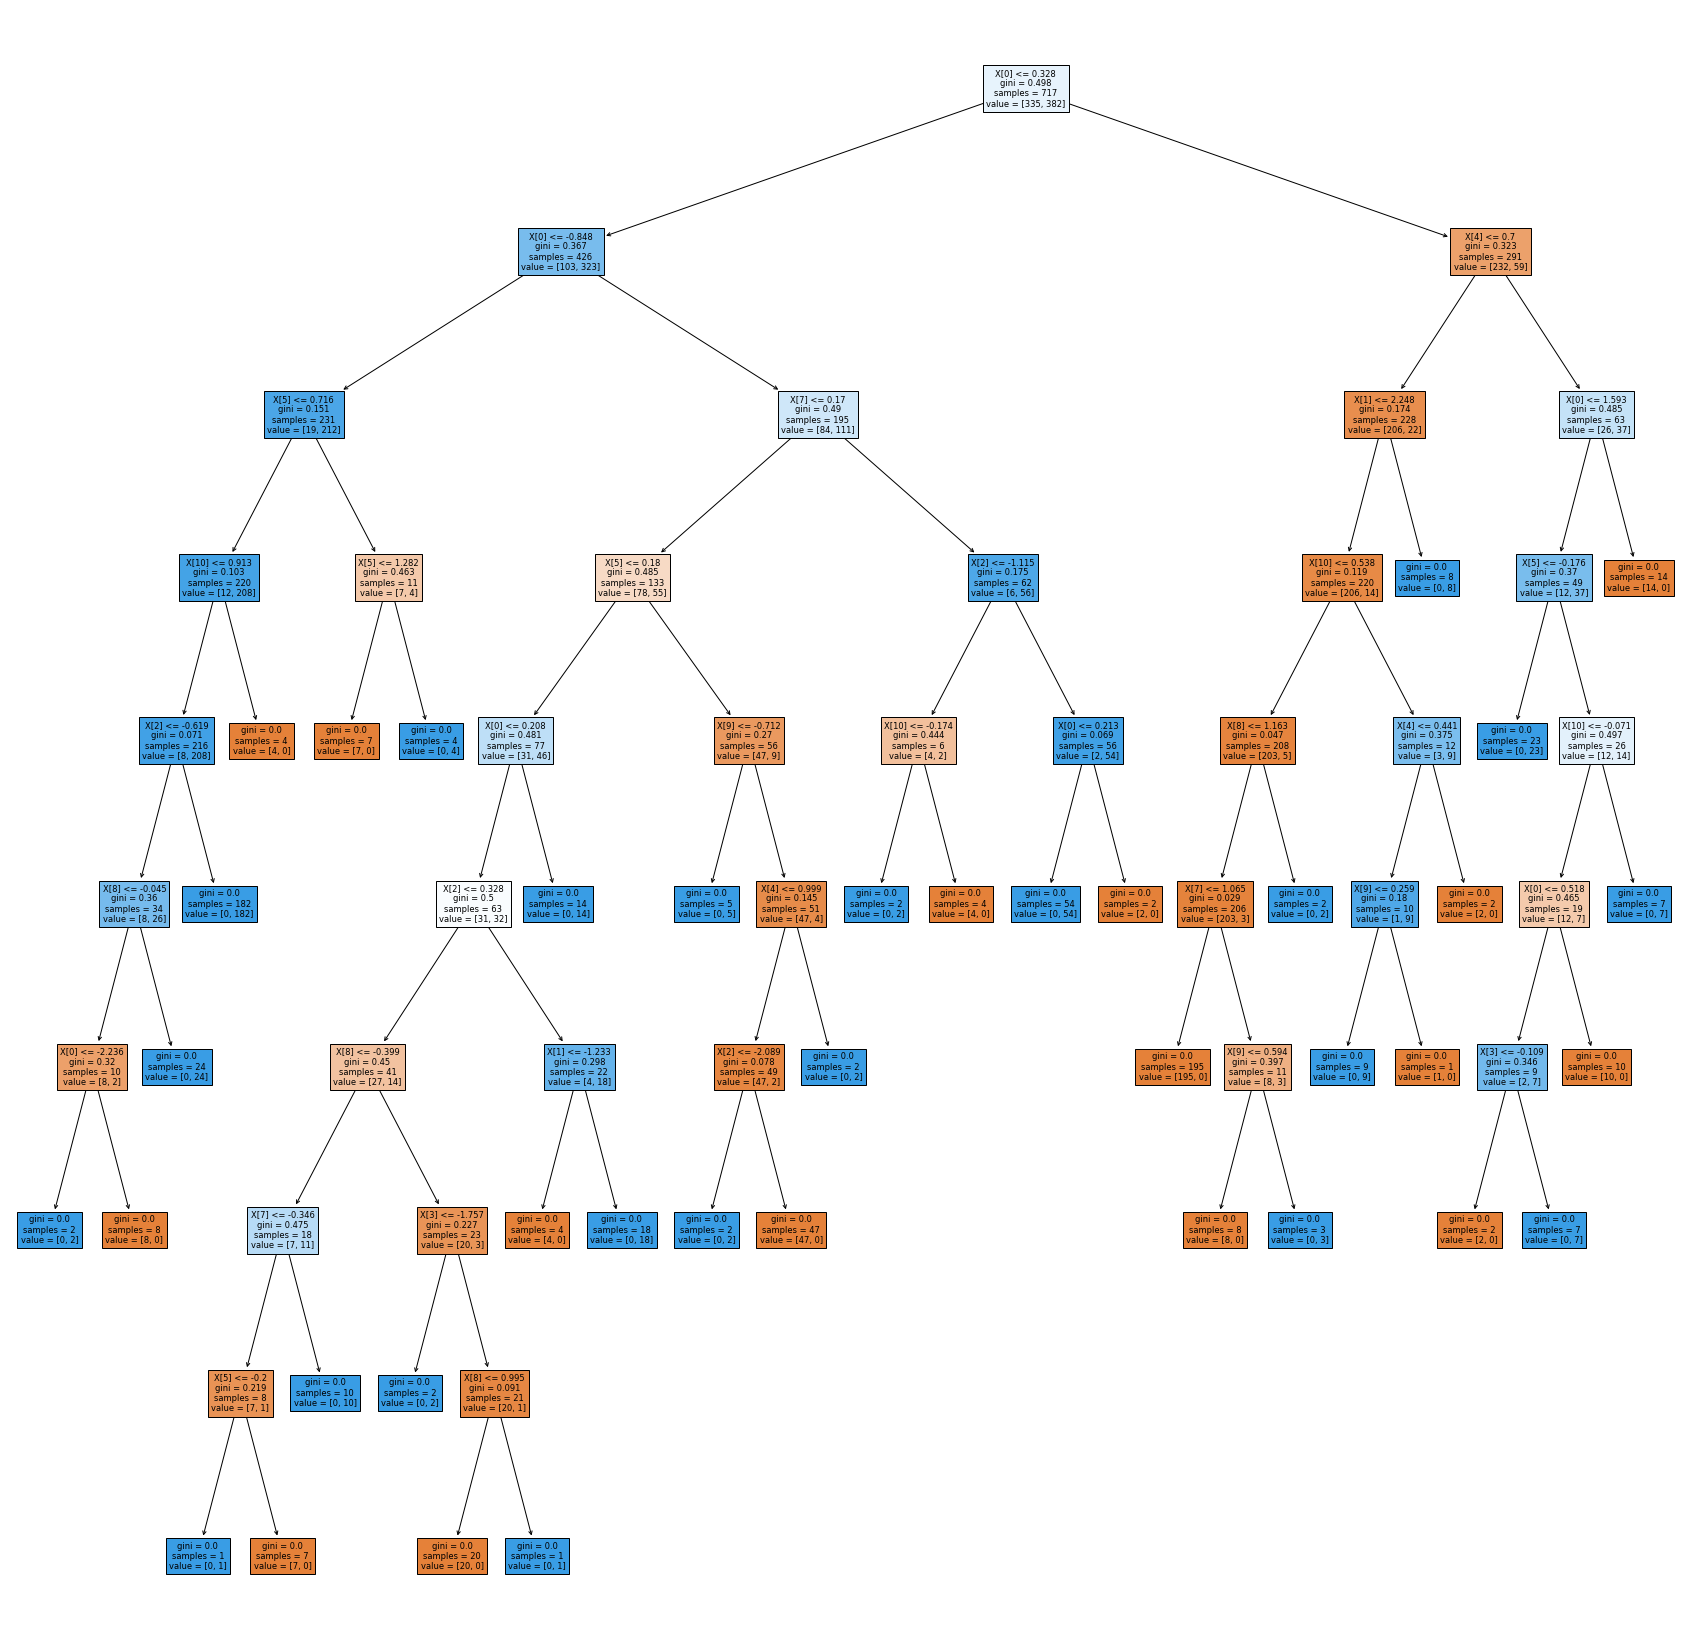

Figure 24- Decision tree with PCA with depth 9

Table 7- K-Nearest Neighbours results


,Depth,PCA,validation accuracy %,test accuracy %
0,None,no,98.05,96.43
1,None,yes,98.74,98.70
2,3,no,82.85,82.79
3,3,yes,83.83,87.66
4,5,no,89.40,84.74
5,5,yes,90.24,93.18
6,7,no,95.96,94.16
7,7,yes,96.09,96.43
8,9,no,97.35,96.43
9,9,yes,97.77,97.73


In [ ]:
columns=['Depth', 'PCA', 'validation accuracy %', 'test accuracy %']
results_df=pd.DataFrame(columns=columns)
best_acc=0
best_acc_pca=0
for d in [None, 3,5,7,9]:
    ##without PCA

    #validation accuracy
    tree=t.DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    tree_val_acc=np.mean(scores)*100
    #print("Tree validation accuracy %.2f%%, with k=%d,  metric=%s" % (tree_val_acc,k, m))
    
    #test accuracy
    tree.fit(X_train, y_train)
    plt.figure(figsize=(30,30))
    i+=1
    plt.title("Decision tree without PCA with depth "+str(d))
    t.plot_tree(tree, filled=True, feature_names=heart_ds.columns)
    plt.show()
    print("Figure "+str(i)+"- Decision tree without PCA with depth "+str(d))
    test_predictions=tree.predict(X_test)
    tree_test_acc=accuracy_score(y_true=y_test, y_pred=test_predictions)*100
    if best_acc<tree_test_acc:
        tree_best=tree
        best_acc=tree_test_acc
    
    
    results_df=results_df.append({'Depth':d, 'PCA':'no', 'validation accuracy %':tree_val_acc, 'test accuracy %':tree_test_acc},ignore_index=True)
    
    #with PCA
    #validation accuracy
    tree=t.DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_trainpc, y_trainpc, cv=10)
    tree_val_acc=np.mean(scores)*100
    
    
    #test accuracy
    tree.fit(X_trainpc, y_trainpc)
    plt.figure(figsize=(30,30))
    plt.title("Decision tree with PCA with depth "+str(d))
    t.plot_tree(tree, filled=True)
    plt.show()
    print("Figure "+str(i)+"- Decision tree with PCA with depth "+str(d))
    test_predictions=tree.predict(X_testpc)
    tree_test_acc=accuracy_score(y_true=y_testpc, y_pred=test_predictions)*100
    if best_acc_pca<knn_test_acc:
        tree_best_pca=tree
        best_acc_pca=tree_test_acc
  
    
    results_df=results_df.append({'Depth':d, 'PCA':'yes', 'validation accuracy %':tree_val_acc, 'test accuracy %':tree_test_acc}, ignore_index=True)

print("\nTable 7- K-Nearest Neighbours results")
display(results_df.round(2))


First of all we can do some observations on the trees, before discussing accuracy results. Each intermediate node contains the following information:


*   attribute with respect to the split was performed and threshold used for the split (for binary attributes the split value is always 0.5). 
*   value of Gini index in the region
* number of samples in the region
*how the samples distribute among the two classes in the region
*orange is related to *target*=0, blue to *target*=1. As the color becomes stronger this means that the value of Gini is lowering so we are close to a pure node. When the node is white it means we have Gini=0.5, hence the two classes are perfectly balanced in the region (this should never happen in a leaf otherwise it is not possible to decide unambiguously a label).

The features that are used for the first splits clearly are the most significant in classification. Therefore, it does not surprise that in all the trees the first 3 most significant attributes to decide the class label are *cp_0*, *thal_2*, *ca*, which in section 2 were already identified as  significantly correlated to the target.
<br>
Looking at the accuracies in Table 7, we can see that as the trees become deeper, the accuracy increases, from *max_depth=3* to *max_depth*=9 there is a 15% increase both in validation and testing. 
The trees built with principal components are similar in their shape, but completely lack of interpretability, which is the main strenght of this model compared to others. So, even if they seem to provide slightly better results in terms of accuracy, this fact should be considered when choosing between the two versions. 



###**3.5 Classification: Random Forest**

Random Forest is a technique that tries to increase the accuracy of a single decision tree, using boosting and feature sampling at splitting time. In boosting, many smaller training subsets are defined and each one is used to build a simple decision tree. A patient to be classified is analysed by each tree, which outputs a prediction. The final label is chosen using majority voting. 
<br>
This mechanism is further improved in Random Forest: still many  trees are built considering different training subset, but in addition to this, each time a split in a tree has to be performed, only a subset of $m$ features among all the ones available is considered. Generally $m=\sqrt{F}$, being F the total number of features of a data object.
<br>
This approach clearly sacrificies interpretability (which could be very useful to doctors) because it becomes quite complex to understand why a certain class label was assigned.
<br>Also in this case different maximum depths for the single trees were considered, in particular values 3,5,7,9. 

In [ ]:
best_acc=0
best_acc_pca=0
columns=['Depth', 'PCA', 'validation accuracy %', 'test accuracy %']
results_df=pd.DataFrame(columns=columns)
for d in [None, 3,5,7,9]:
    ##without PCA

    #validation accuracy
    tree=rf(max_depth=d, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    tree_val_acc=np.mean(scores)*100
    #print("Tree validation accuracy %.2f%%, with k=%d,  metric=%s" % (tree_val_acc,k, m))
    
    #test accuracy
    tree.fit(X_train, y_train)
    test_predictions=tree.predict(X_test)
    tree_test_acc=accuracy_score(y_true=y_test, y_pred=test_predictions)*100
    if best_acc<tree_test_acc:
        forest_best=tree
        best_acc=tree_test_acc
    #print("KNN test accuracy %.2f%%, with k=%d,  metric=%s" % (knn_test_acc,k, m))
    
    results_df=results_df.append({'Depth':d, 'PCA':'no', 'validation accuracy %':tree_val_acc, 'test accuracy %':tree_test_acc},ignore_index=True)
    
    #with PCA
    #validation accuracy
    tree=rf(max_depth=d, random_state=42)
    scores = cross_val_score(tree, X_trainpc, y_trainpc, cv=10)
    tree_val_acc=np.mean(scores)*100
    #print("(PCA)KNN validation accuracy %.2f%%, with k=%d,  metric=%s" % (knn_val_acc,k, m))
    
    #test accuracy
    tree.fit(X_trainpc, y_trainpc)
    test_predictions=tree.predict(X_testpc)
    tree_test_acc=accuracy_score(y_true=y_testpc, y_pred=test_predictions)*100
    if best_acc_pca<knn_test_acc:
        forest_best_pca=tree
        best_acc_pca=tree_test_acc
    #print("(PCA)KNN test accuracy %.2f%%, with k=%d,  metric=%s" % (knn_test_acc,k, m))
    
    results_df=results_df.append({'Depth':d, 'PCA':'yes', 'validation accuracy %':tree_val_acc, 'test accuracy %':tree_test_acc}, ignore_index=True)

print("Table 8- Random Forest results")
display(results_df.round(2))

Table 8- Random Forest results


,Depth,PCA,validation accuracy %,test accuracy %
0,None,no,98.61,97.73
1,None,yes,99.58,98.70
2,3,no,86.05,84.09
3,3,yes,88.14,90.91
4,5,no,90.52,89.61
5,5,yes,94.00,95.45
6,7,no,96.38,95.78
7,7,yes,98.33,99.03
8,9,no,98.19,96.75
9,9,yes,99.30,99.03


Comparing the results in Table 8 with the one in Table 7, there is in general an increase of 2-3% in accuracy with respect to simple decision trees, even if this is less evident for forests with deeper trees. Again, models built on principal components seem to perform slightly better and considering that interpretability was already sacrificed, it could be meaningful to employe them. 

## **4. Models comparison** 

###**4.1 Test accuracy**

Table 9 contains a summary of the best test accuracy reached by each model (with and without PCA).
<br>
<center>Table 9- Best test accuray reached by each model </center>

| Model                | Best test accuracy %    |   Best test accuracy (PCA) % |
|----------------------|--------------------|------------------------------|
| Gaussian Naive Bayes |        83.77       |           83.12              |
| K-NN                 |        97.73       |           97.73              |
| Decision Tree        |        96.75       |           98.70              |
| Random Forest        |        97.73       |           99.03              |


Random Forest is the model that, considering either original features or principal components, performs the best among the four, even if K-NN and Decision Tree provide similar results, with the advantage of having an higher interpretability. In the next section, a more detailed comparison of the models considering confusion matrices (from which precision and recall are evaluated) and ROCs is considered. 

###**4.2 Confusion matrices, precision and recall**

For a binary classifier the confusion matrix is a 2x2 matrix that contains information on how many objects in the test set were correctly or not classified. In particular it stores:


*   True Positives (TP), positive instances correctly classified
*   False Positives (FP), negative instances wrongly classified, also known as False Alarm
*   True Negatives (TN), negative instances correctly classified
*   False Negatives (FP), positive instances wrongly classified

Positive in this case correspond to *target*=1 hence a patient with heart disease. From this matrix, two important metrics can be computed: precision and recall. They provide additional information with respect to accuracy on how samples are classified with respect to each class and are defined as follows
>$$precision=\frac{TP}{TP+FN}$$
<br>
>$$recall=\frac{TP}{TP+FP}$$

Precision measures how good the model is at identifying sick patients, recall (also known as sensitivity) instead how many patients were really positive among the ones identified so. In a perfect classifier, both values should be very high; in pratice, there is a trade off between these two values.  Figures  25-32 show the confusion matrices (not normalised) of the trained classifiers, considering only the models with parameters configuration that performed best at test time. Table 10-11 contain precision and recall values. 



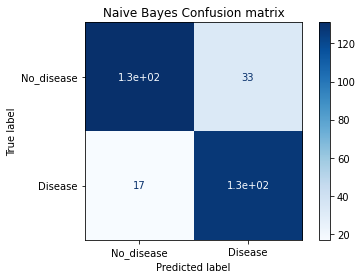

Figure 25- Naive Bayes Confusion matrix



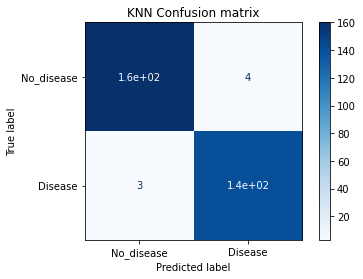

Figure 26- KNN Confusion matrix



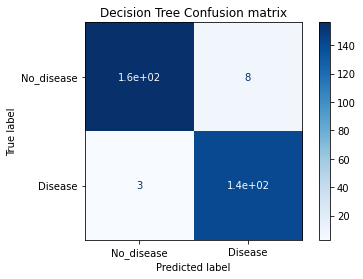

Figure 27- Decision Tree Confusion matrix



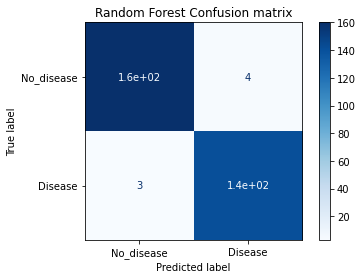

Figure 28- Random Forest Confusion matrix



Table 10- Precision and Recall for best classifiers


,Model,precision class 0 (%),recall class 0 (%),precision class 1 (%),recall class 1 (%)
0,Naive Bayes,88.51,79.88,79.38,88.19
1,KNN,98.16,97.56,97.24,97.92
2,Decision Tree,98.11,95.12,94.63,97.92
3,Random Forest,98.16,97.56,97.24,97.92


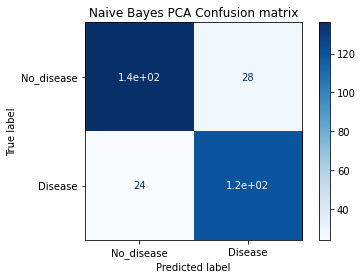

Figure 29- Naive Bayes PCA Confusion matrix



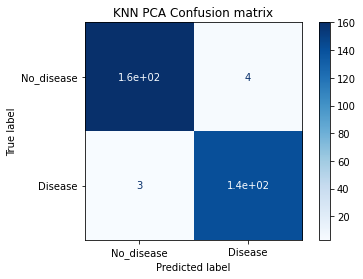

Figure 30- KNN PCA Confusion matrix



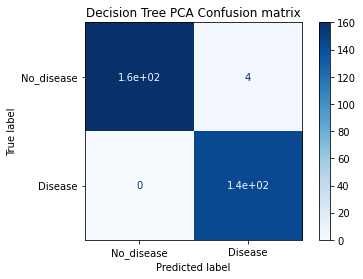

Figure 31- Decision Tree PCA Confusion matrix



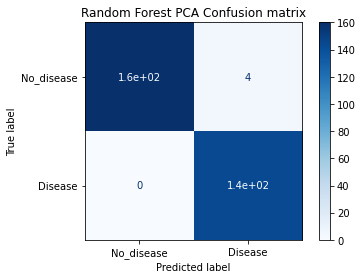

Figure 32- Random Forest PCA Confusion matrix



Table 11- Precision and Recall for best classifiers with PCA


,Model,precision class 0 (%),recall class 0 (%),precision class 1 (%),recall class 1 (%)
0,Naive Bayes,85.00,82.93,81.08,83.33
1,KNN,98.16,97.56,97.24,97.92
2,Decision Tree,100.00,97.56,97.30,100.00
3,Random Forest,100.00,97.56,97.30,100.00


In [ ]:
columns=['Model', 'precision class 0 (%)', 'recall class 0 (%)', 'precision class 1 (%)', 'recall class 1 (%)']
results_df=pd.DataFrame(columns=columns)
##confusion matrix no PCA
for classifier, name in zip([nb, knn_best, tree_best, forest_best], ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']):
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['No_disease', 'Disease'],
                                 cmap=plt.cm.Blues)
    y_hat=classifier.predict(X_test)
    precision, recall, _, _ =precision_recall_fscore_support(y_test, y_hat)
    results_df=results_df.append({'Model':name, 'precision class 0 (%)':precision[0]*100, 'recall class 0 (%)':recall[0]*100, 'precision class 1 (%)':precision[1]*100, 'recall class 1 (%)':recall[1]*100 },ignore_index=True)
    title=name+' Confusion matrix'
    disp.ax_.set_title(title)
    plt.show()
    i+=1
    print("Figure "+str(i)+"- "+title+"\n")
print("\n\nTable 10- Precision and Recall for best classifiers")
display(results_df.round(2))
print("\n\n")

results_df=results_df.iloc[0:0]
##confusion matrix PCA
for classifier, name in zip([nb_pca, knn_best_pca, tree_best_pca, forest_best_pca], ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']):
    disp = plot_confusion_matrix(classifier, X_testpc, y_testpc,
                                 display_labels=['No_disease', 'Disease'],
                                 cmap=plt.cm.Blues)
    y_hat=classifier.predict(X_testpc)
    precision, recall, _, _=precision_recall_fscore_support(y_testpc, y_hat)
    results_df=results_df.append({'Model':name, 'precision class 0 (%)':precision[0]*100, 'recall class 0 (%)':recall[0]*100, 'precision class 1 (%)':precision[1]*100, 'recall class 1 (%)':recall[1]*100 },ignore_index=True)
    title=name+' PCA Confusion matrix'
    disp.ax_.set_title(title)
    plt.show()
    i+=1
    print("Figure "+str(i)+"- "+title+"\n")
print("\n\nTable 11- Precision and Recall for best classifiers with PCA")
display(results_df.round(2))


Some observations from Table 10:


1.   As for accuracy, Gaussian Naive Bayes is the model performing worst. Precision is high for healthy patient (88.51%), but conversely recall for the class is 10% lower, hence the model tends to label mainly patients as healty (high precision) making many mistakes (low recall). For sick patients the opposite situation is true. 
2.   KNN, Decision Tree and Random Forest show very high results for both the parameters, therefore the models are able to recognize quite well samples from both classes. Even if Random Forest was better in terms of test accuracy, it has precision and recall identical to K-Nearest Neighbour(K=1).

Some observations from Table 11:


1. The usage of principal components in Naive Bayes reduces the precision in identifying healthy patients (85%) but increases the recall for the class (82.93%) and more importantly it increases precision in class 1.
2. Again KNN, Decision Tree and Random Forest provide all very high scores, even higher than before because the model were trained on principal components. Decision Tree and Random Forest are the best,  with a 100% precision for healthy patients and a 100% recall for sick ones. Thefore these two model classifity only sick patients as such without making mistakes, even if few are not recognised (precision is 97.30%).




###**4.3 ROC**


Finally, the trained models can be compared looking at their ROC curves. Receiver Operating Characteristic (ROC) is a diagram which is commonly used to compare the performances of different binary classification models. <br>
ROC is obtained plotting recall (sensitivity) versus False Positive (False Alarm), considering the probability of a model to outcome a certain predicition. Each point of the curve is drawn selecting a threshold for the probability of being in the positive class and computing with respect to that threshold sensitivity and false positives of the obtained predictions. Ideally the curve should tend to point (1,0), which means that the classifier recognises positive (where positive in this case means a sick patient) samples without making mistakes. In pratice this is never achieved, but given the ROCs of different classifier we can select the best considering which one maximizes the area under its ROC. 
Figure 33-34 compare ROCs of the best classifiers with and without PCA.


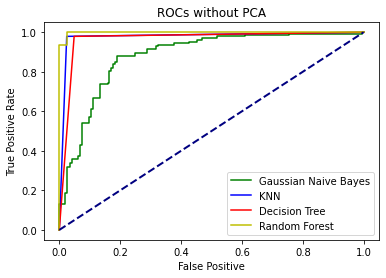

Figure 33- ROCs without PCA


Table 12- Area under ROC for best models


,Model,area under ROC
0,Naive Bayes,0.88
1,KNN,0.98
2,Decision Tree,0.97
3,Random Forest,1.00


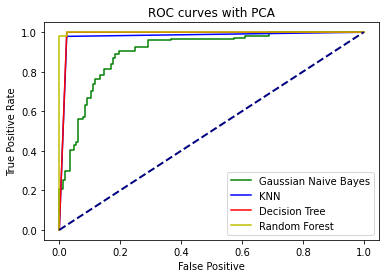

Figure 34- ROCs with PCA

Table 13-Area under ROC for best models with PCA


,Model,area under ROC
0,Naive Bayes,0.90
1,KNN,0.98
2,Decision Tree,0.99
3,Random Forest,1.00


In [ ]:
#ROC curves of classifier without PCA 
columns=['Model', 'area under ROC']
results_df=pd.DataFrame(columns=columns)


nb_test_prob=nb.predict_proba(X_test)
knn_test_prob=knn_best.predict_proba(X_test)
tree_test_prob=tree_best.predict_proba(X_test)
forest_test_prob=forest_best.predict_proba(X_test)

nb_fpr, nb_tpr,_=ROC(y_test, nb_test_prob[:,1])
nb_auc=roc_auc_score(y_test, nb_test_prob[:,1])
results_df=results_df.append({'Model':'Naive Bayes', 'area under ROC':nb_auc}, ignore_index=True)
knn_fpr, knn_tpr,_=ROC(y_test, knn_test_prob[:,1])
knn_auc=roc_auc_score(y_test, knn_test_prob[:,1])
results_df=results_df.append({'Model':'KNN', 'area under ROC':knn_auc}, ignore_index=True)
tree_fpr, tree_tpr,_=ROC(y_test, tree_test_prob[:,1])
tree_auc=roc_auc_score(y_test, tree_test_prob[:,1])
results_df=results_df.append({'Model':'Decision Tree', 'area under ROC':tree_auc}, ignore_index=True)
forest_fpr, forest_tpr,_=ROC(y_test, forest_test_prob[:,1])
forest_auc=roc_auc_score(y_test, forest_test_prob[:,1])
results_df=results_df.append({'Model':'Random Forest', 'area under ROC':forest_auc}, ignore_index=True)

plt.figure()
plt.title("ROCs without PCA")
p1=plt.plot(nb_fpr, nb_tpr, c='g', label='Gaussian Naive Bayes')
p2=plt.plot(knn_fpr, knn_tpr, c='b', label='KNN')
p3=plt.plot(tree_fpr, tree_tpr, c='r', label='Decision Tree')
p4=plt.plot(forest_fpr, forest_tpr, c='y', label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()
i+=1
print("Figure "+str(i)+"- ROCs without PCA\n")
print("\nTable 12- Area under ROC for best models")
display(results_df.round(2))
print("\n")

results_df=results_df.iloc[0:0]

#ROC curves of classifier with PCA 
nb_test_prob=nb_pca.predict_proba(X_testpc)
knn_test_prob=knn_best_pca.predict_proba(X_testpc)
tree_test_prob=tree_best_pca.predict_proba(X_testpc)
forest_test_prob=forest_best_pca.predict_proba(X_testpc)

nb_fpr, nb_tpr,_=ROC(y_test, nb_test_prob[:,1])
nb_auc_pc=roc_auc_score(y_test, nb_test_prob[:,1])
results_df=results_df.append({'Model':'Naive Bayes', 'area under ROC':nb_auc_pc}, ignore_index=True)
knn_fpr, knn_tpr,_=ROC(y_test, knn_test_prob[:,1])
knn_auc_pc=roc_auc_score(y_test, knn_test_prob[:,1])
results_df=results_df.append({'Model':'KNN', 'area under ROC':knn_auc_pc}, ignore_index=True)
tree_fpr, tree_tpr,_=ROC(y_test, tree_test_prob[:,1])
tree_auc_pc=roc_auc_score(y_test, tree_test_prob[:,1])
results_df=results_df.append({'Model':'Decision Tree', 'area under ROC':tree_auc_pc}, ignore_index=True)
forest_fpr, forest_tpr,_=ROC(y_test, forest_test_prob[:,1])
forest_auc_pc=roc_auc_score(y_test, forest_test_prob[:,1])
results_df=results_df.append({'Model':'Random Forest', 'area under ROC':forest_auc_pc}, ignore_index=True)

plt.figure()
plt.title("ROC curves with PCA")
p1=plt.plot(nb_fpr, nb_tpr, c='g', label='Gaussian Naive Bayes')
p2=plt.plot(knn_fpr, knn_tpr, c='b', label='KNN')
p3=plt.plot(tree_fpr, tree_tpr, c='r', label='Decision Tree')
p4=plt.plot(forest_fpr, forest_tpr, c='y', label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()
i+=1
print("Figure "+str(i)+"- ROCs with PCA")
print("\nTable 13-Area under ROC for best models with PCA")
display(results_df.round(2))

As it can be appreciated  all the models have very large areas under ROC, that slightly increases when they are trained on principal compontents. Random Forest as we already identified in the previous sections is the best performing classifier and reaches the ideal area of 1. Clearly this does not mean that Random Forest is the perfect classifier, but with the data available really reaches high performances. 

##**5. Conclusions**

Summing up the obtained results, it can be observed that all the proposed methods, once their hyperparameters have been correctly tuned, provide very high accuracy in the "heart disease vs no heart disease" classification task. The choice between the different approaches therefore should be done considering also other aspects apart from accuracy, related to the application domain, which is a medical one. 
In machine learning models for medicine, two important aspects should be considered: false positive (false alarm) and interpretability. 
False positive should be as small as possible, otherwise a patient could undergo treatments for a diseases it does not really have, with severe side effects. Interpretability is crucial in order to make the model applicable in real scenarios: doctors want to understand why a certain decision was taken by the classifier in order understand, for example, which features/measured parameters are more relevant indicators of the pathology. 
Considering all these aspects, decision tree is the classifier that according to the previous analysis suits better the problem. <br>
About PCA, it can be observed that it is useful as a mechanism for pure dimensionality reduction (from 23 to 11 attributes) but it provides only small improvement over accuracy, with an inevitable loss in terms of interpretability. 